University prediction models DataSet


In [4]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)  # For reproducibility

num_samples = 10000

physics_marks = np.random.randint(30, 100, num_samples)
math_marks = np.random.randint(20, 100, num_samples)
english_marks = np.random.randint(40, 100, num_samples)

universities = ['University A', 'University B', 'University C', 'University D', 'University E']
university = [random.choice(universities) for _ in range(num_samples)]

admission_status = np.random.choice(['Admitted', 'Rejected'], num_samples, p=[0.6, 0.4]) #60% chance of admission
total_attempts = np.random.randint(1, 4, num_samples)

data_university = pd.DataFrame({
    'physics_marks': physics_marks,
    'math_marks': math_marks,
    'english_marks': english_marks,
    'university': university,
    'admission_status': admission_status,
    'total_attempts': total_attempts
})

data_university.to_csv('university_recommendation_data.csv', index=False)
print("University Recommendation Dataset Created.")
(data_university)

University Recommendation Dataset Created.


physics_marks  math_marks  english_marks    university admission_status  \
0                81          84             96  University D         Admitted   
1                44          57             70  University A         Admitted   
2                90          96             83  University D         Rejected   
3                50          30             50  University E         Admitted   
4                53          29             64  University E         Admitted   
...             ...         ...            ...           ...              ...   
9995             76          81             80  University C         Admitted   
9996             31          63             47  University E         Admitted   
9997             68          67             98  University C         Rejected   
9998             74          93             42  University D         Admitted   
9999             61          78             44  University C         Admitted   

      total_attempts  
0                  1  
1                  2  
2                  3  
3                  1  
4                  1  
...              ...  
9995               2  
9996               2  
9997               1  
9998               3  
9999               3  

[10000 rows x 6 columns]

In [5]:
data_university.english_marks.describe()


count    10000.000000
mean        69.264300
std         17.211568
min         40.000000
25%         54.000000
50%         69.000000
75%         84.000000
max         99.000000
Name: english_marks, dtype: float64

In [6]:
data_university.physics_marks.describe()

count    10000.000000
mean        64.542100
std         20.188967
min         30.000000
25%         47.000000
50%         64.000000
75%         82.000000
max         99.000000
Name: physics_marks, dtype: float64

In [7]:
data_university.describe()


physics_marks    math_marks  english_marks  total_attempts
count   10000.000000  10000.000000   10000.000000    10000.000000
mean       64.542100     59.482500      69.264300        1.998900
std        20.188967     23.072601      17.211568        0.811643
min        30.000000     20.000000      40.000000        1.000000
25%        47.000000     39.000000      54.000000        1.000000
50%        64.000000     60.000000      69.000000        2.000000
75%        82.000000     79.000000      84.000000        3.000000
max        99.000000     99.000000      99.000000        3.000000

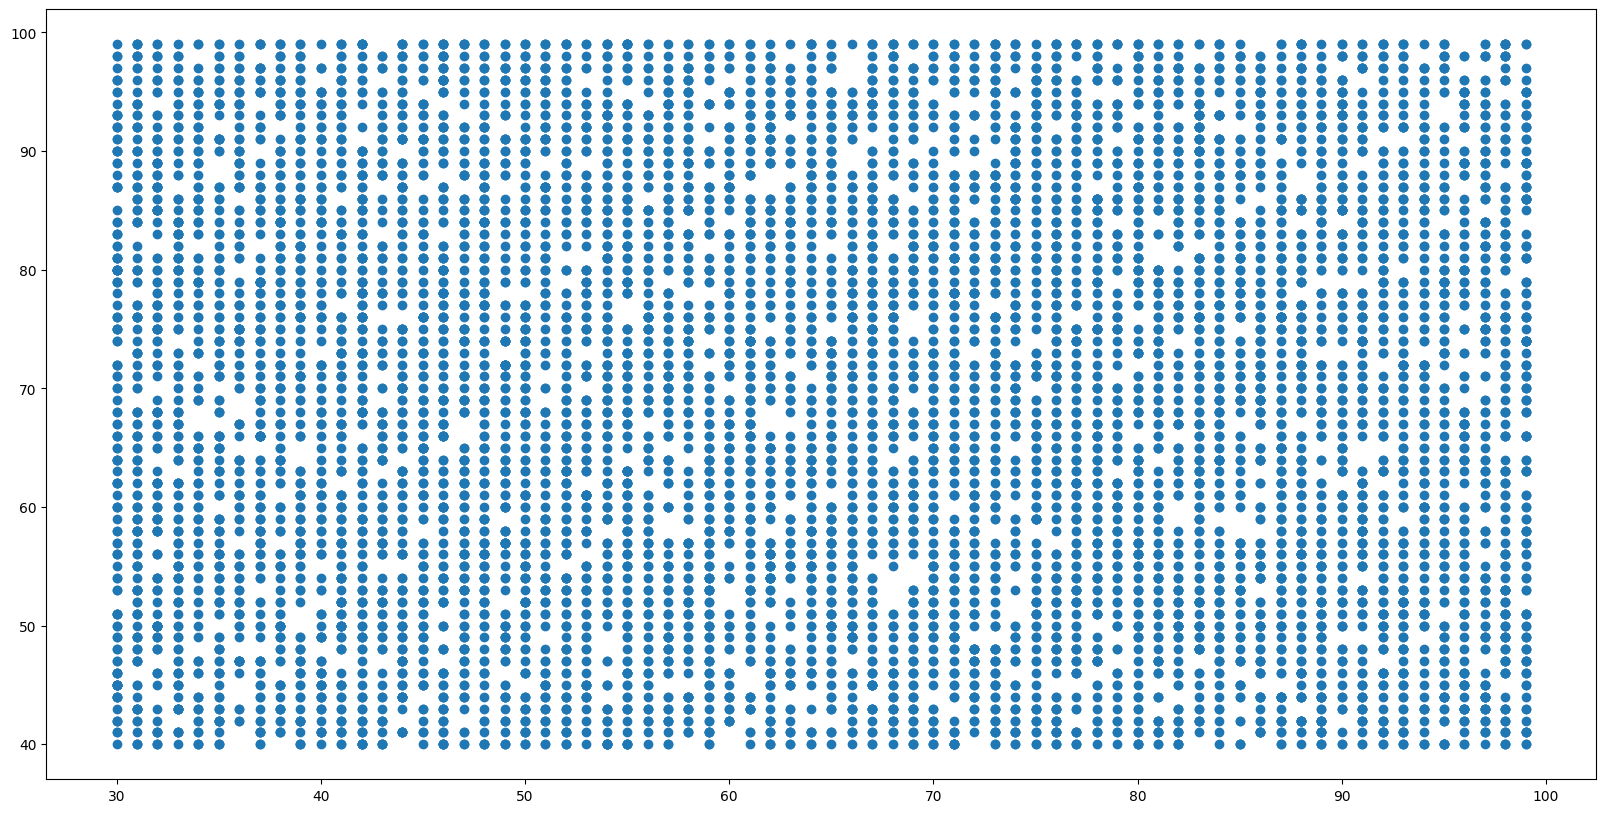

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.scatter(data_university.physics_marks,data_university.english_marks)
plt.show()

The above dataset is too uniform so we use different method to create realistic dataset
-Normal Distribution

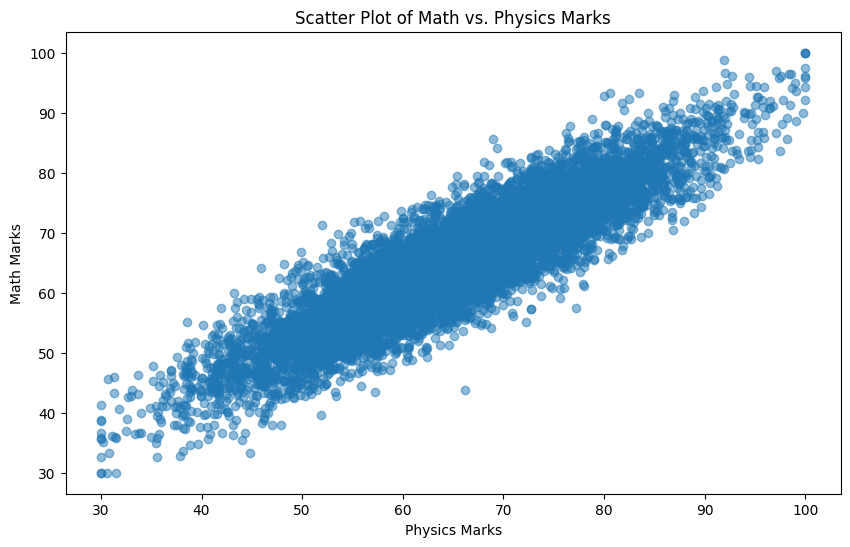

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
num_samples = 10000

np.random.seed(42)  # For reproducibility

# Generate math marks (normally distributed)
math_marks = np.random.normal(loc=65, scale=10, size=num_samples)

# Create correlated physics marks with some randomness
physics_marks = math_marks + np.random.normal(loc=0, scale=5, size=num_samples)
english_marks = 100 - math_marks * 0.3 + np.random.normal(loc=5, scale=10, size=num_samples) 
# Clip values to stay within valid range
math_marks = np.clip(math_marks, 30, 100)
physics_marks = np.clip(physics_marks, 30, 100)

#creating dataset
data_frame={'Physics Marks':physics_marks,'Math Marks':math_marks, 'English Marks':english_marks}
data_frame=pd.DataFrame(data_frame)
data_frame.to_csv("Student_marks_dataset.csv")
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(physics_marks, math_marks, alpha=0.5)  # Add transparency for density
plt.xlabel("Physics Marks")
plt.ylabel("Math Marks")
plt.title("Scatter Plot of Math vs. Physics Marks")
plt.show()


In [10]:
correlation_factor = 0.8  # Higher means stronger correlation
physics_marks = correlation_factor * math_marks + (1 - correlation_factor) * np.random.normal(65, 10, 10000)


In [11]:
math_marks += np.random.uniform(-2, 2, 1000)  # Small random shift
physics_marks += np.random.uniform(-2, 2, 1000)


ValueError: operands could not be broadcast together with shapes (10000,) (1000,) (10000,) 

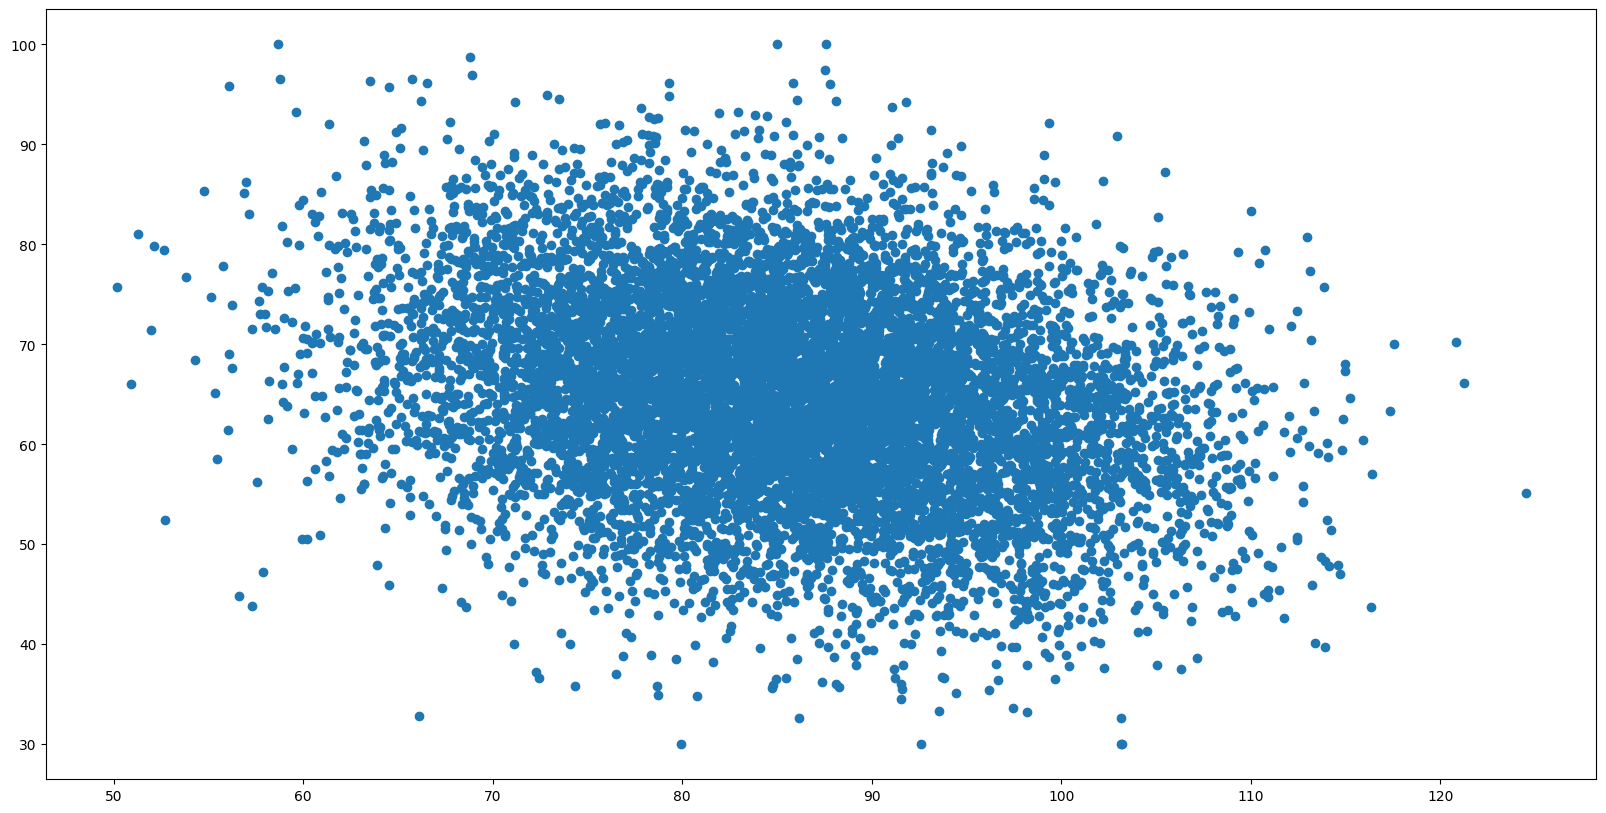

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.scatter(english_marks,math_marks)
plt.show()

To set the range of marks we used <b>min-max scaling


In [ ]:
import numpy as np

num_samples = 10000  # Adjust the number of students

# Generate raw marks
math_marks = np.random.normal(loc=65, scale=10, size=num_samples)
physics_marks = math_marks + np.random.normal(loc=0, scale=5, size=num_samples)
english_marks = 100 - math_marks * 0.3 + np.random.normal(loc=5, scale=10, size=num_samples)

# Min-max scaling function
def scale_marks(marks, new_min, new_max):
    old_min, old_max = np.min(marks), np.max(marks)
    return (marks - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

# Scale to required ranges
math_marks = scale_marks(math_marks, 0, 90)
physics_marks = scale_marks(physics_marks, 0, 90)
english_marks = scale_marks(english_marks, 0, 20)

# Total marks
total_marks = math_marks + physics_marks + english_marks

# Ensure total is in range [0, 200]
print(f"Math Range: {math_marks.min()} - {math_marks.max()}")
print(f"Physics Range: {physics_marks.min()} - {physics_marks.max()}")
print(f"English Range: {english_marks.min()} - {english_marks.max()}")
print(f"Total Range: {total_marks.min()} - {total_marks.max()}")


Math Range: 0.0 - 90.0
Physics Range: 0.0 - 90.0
English Range: 0.0 - 20.0
Total Range: 13.260993613199938 - 183.29137174303202


Using clip function we ensure the marks are within range


In [ ]:
math_marks = np.random.normal(loc=75, scale=10, size=num_samples)
math_marks = np.clip(math_marks, 0, 90)  # Ensure within 0-90

# Generate physics marks (correlated with math + randomness)
physics_marks = math_marks + np.random.normal(loc=0, scale=5, size=num_samples)
physics_marks = np.clip(physics_marks, 0, 90)  # Ensure within 0-90

# Generate English marks (formula-based, then clipping)
english_raw = 100 - math_marks * 0.3 + np.random.normal(loc=5, scale=15, size=num_samples)

# Normalize English Marks
min_eng, max_eng = english_raw.min(), english_raw.max()
english_marks = 20 * (english_raw - min_eng) / (max_eng - min_eng)  # Scale to 0-20 

universities = ['FAST', 'NUST', 'GIKI', 'IBA', 'LUMS']
university = [random.choice(universities) for _ in range(num_samples)]


#number of attempts
number_of_attempts=[]
for i in range(10000):
    number_of_attempts.append(np.random.randint(1,4))


#admission status
#admitted those who scored 70 above in physics and math 
for i in range(10000):
    if(physics_marks[i]>=70) and (math_marks[i]>=70):
        admission_status[i]='Admitted'
    else:
        admission_status[i]='Rejected'


In [ ]:
data_set=pd.DataFrame(
    {
        'physics_marks':physics_marks, 
        'math_marks':math_marks,
        'english_marks':english_marks,
        'university':university,
        'admission_status':admission_status,
        'number_of_attempts':number_of_attempts,
        # 'Number of attempts':number_of_attempts
        
    }
)
data_set['english_marks']=data_set['english_marks'].astype(int)
data_set['physics_marks']=data_set['physics_marks'].astype(int)
data_set['math_marks']=data_set['math_marks'].astype(int)

In [ ]:
data_set

physics_marks  math_marks  english_marks university admission_status  \
0                69          69             15       FAST         Rejected   
1                79          74             13       GIKI         Admitted   
2                82          89             11       FAST         Admitted   
3                74          76             16       NUST         Admitted   
4                75          73             15       NUST         Admitted   
...             ...         ...            ...        ...              ...   
9995             76          78              7       NUST         Admitted   
9996             85          84             11       FAST         Admitted   
9997             74          71             13       GIKI         Admitted   
9998             59          61              9       GIKI         Rejected   
9999             73          72              5       NUST         Admitted   

      number_of_attempts  
0                      1  
1                      1  
2                      2  
3                      1  
4                      2  
...                  ...  
9995                   3  
9996                   1  
9997                   3  
9998                   3  
9999                   2  

[10000 rows x 6 columns]

In [ ]:
data_set[data_set['admission_status']=='Rejected'].count()

physics_marks         3852
math_marks            3852
english_marks         3852
university            3852
admission_status      3852
number_of_attempts    3852
dtype: int64

In [ ]:
data_set[data_set['admission_status']=='Admitted'].count()


physics_marks         6148
math_marks            6148
english_marks         6148
university            6148
admission_status      6148
number_of_attempts    6148
dtype: int64

In [ ]:
data_set['number_of_attempts'].value_counts()

number_of_attempts
2    3374
1    3333
3    3293
Name: count, dtype: int64

<h2>First Final Dataset For Model 1


In [ ]:
#creating csv file for final Dataset for model training
data_set.to_csv('Model_1_Univeristy_admission_prediction.csv')

Creating Model 1

data_set.colmun

In [ ]:
data_set.columns

Index(['physics_marks', 'math_marks', 'english_marks', 'university',
       'admission_status', 'number_of_attempts'],
      dtype='object')

<h2>The above generated dataset was not complete or have few attribute to make a realistic model

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy.stats import truncnorm

np.random.seed(42)
random.seed(42)

universities = {
    'FAST': {'difficulty': 6, 'fields': ['CS', 'Engineering']},
    'NUST': {'difficulty': 7.0, 'fields': ['CS', 'Engineering', 'Medicine']},
    'PIEAS': {'difficulty': 7, 'fields': ['Engineering']},
    'UET': {'difficulty': 6.5, 'fields': ['Engineering']},
    'COMSATS': {'difficulty': 6.0, 'fields': ['CS', 'Business']},
    'GIKI': {'difficulty': 8, 'fields': ['Engineering', 'CS']}
}
fields = ['CS', 'Engineering', 'Medicine', 'Business']
regions = ['GB', 'Punjab', 'Sindh', 'KPK', 'Balochistan']

def student_field_tendency(field):
    if field == 'CS':
        # Strong math, decent physics, low English
        return {'math': 85, 'physics': 35, 'english': 20}  # out of 100/60/40
    elif field == 'Engineering':
        # Strong math and physics, weaker English
        return {'math': 80, 'physics': 50, 'english': 15}
    elif field == 'Medicine':
        # Strong English and physics, decent math
        return {'math': 65, 'physics': 45, 'english': 32}
    else:
        # Default - assume Arts/Humanities tendency
        return {'math': 55, 'physics': 30, 'english': 35}


#Give spike error in dataset like to many values at bottom and end
# def generate_marks(base, attempt_boost, max_score):
#     raw = np.random.normal(base + attempt_boost, 10)
#     return np.clip(raw, max_score * 0.35, max_score)  # minimum = 35% of max



def generate_marks(base, attempt_boost, max_score):
    lower = max_score * 0.35
    upper = max_score
    mean = base + attempt_boost
    std_dev = 10

    # Convert to standard normal bounds
    a, b = (lower - mean) / std_dev, (upper - mean) / std_dev
    marks = truncnorm.rvs(a, b, loc=mean, scale=std_dev)
    return round(marks, 1)


def generate_time_taken(subject):
    # Time allocation per subject (in minutes)
    time_alloc = {'math': 90, 'physics': 54, 'english': 36}
    
    # Check that the subject is valid
    if subject not in time_alloc:
        raise ValueError(f"Invalid subject: {subject}")
    
    # Adding variation (±5 minutes noise) based on the subject
    variation = np.random.normal(0, 5)  # ±5 minutes noise
    
    # Return the generated time, clipped between a min and max range for each subject
    return np.clip(time_alloc[subject] + variation, 15, time_alloc[subject] + 10)



target_per_class = 50000 // 2

# Initialize counters
yes_count = 0
no_count = 0

admission_counter = {uni: 0 for uni in universities}  # <-- move this to the top, before while loop
MAX_PER_UNI = 5000  # cap per university

data = []
i = 0



In [74]:
max_iterations = 100000  # or even 120000 if you want to be safe
iterations = 0


In [ ]:
while (yes_count < target_per_class or no_count < target_per_class) and iterations < max_iterations:
    iterations += 1
    field = random.choice(fields)
    region = random.choice(regions)
    base_scores = student_field_tendency(field)
    attempts = random.randint(1, 3)
    attempt_boost = (attempts - 1) * 3  # slight improvement on repeat

    # Generate realistic marks
    physics = generate_marks(base_scores['physics'], attempt_boost, 60)
    math = generate_marks(base_scores['math'], attempt_boost, 100)
    english = generate_marks(base_scores['english'], attempt_boost, 40)

    avg = (math + physics + english) / 3

    # Time spent (correlated to marks with some randomness)
    time_math = generate_time_taken('math')
    time_physics = generate_time_taken('physics')
    time_english = generate_time_taken('english')

    # Choose universities that offer the preferred field
    possible_unis = [u for u in universities if field in universities[u]['fields']]
    uni_choices = random.sample(possible_unis, k=min(3, len(possible_unis)))

    

    # Evaluate admission for each university choice
    admitted_uni = None
    admission_status = 'No'
    accepted = False
    
    if (yes_count + no_count) % 1000 == 0:
        print(f"Yes: {yes_count}, No: {no_count}, Total: {yes_count + no_count}")
        print(f"Field: {field}, Avg: {avg:.2f}, Difficulty: {diff_index}, Admission Chance: {admission_chance:.2f}")
    
    for uni in uni_choices:
        diff_index = universities[uni]['difficulty']
        # if iterations % 500 == 0:
        #          print(f"Avg: {avg:.2f}, Difficulty: {diff_index}, Admission Chance: {admission_chance:.2f}")

        admission_chance = avg - (np.log1p(diff_index) * 12) + np.random.uniform(-3, 3)



        # if admission_chance > 0 and yes_count < target_per_class and admission_counter[uni] < MAX_PER_UNI:
        if admission_chance > 0 and yes_count < target_per_class and admission_counter[uni] < MAX_PER_UNI:
            admission_status = 'Yes'
            admitted_uni = uni
            yes_count += 1
            admission_counter[uni] += 1
            accepted = True
            break
        elif admission_chance <= 0 and no_count < target_per_class:
            admission_status = 'No'
            admitted_uni = uni  # just record which one rejected
            no_count += 1
            accepted = True
            break  # Exit after first useful decision

    if not accepted:
        continue  # skip adding data if no decision was valid


    data.append({
        'student_id': f'ST{i+1:05}',
        'physics_marks': round(physics, 2),
        'math_marks': round(math, 2),
        'english_marks': round(english, 2),
        'average_marks': round(avg, 2),
        'time_physics': time_physics,
        'time_math': time_math,
        'time_english': time_english,
        'number_of_attempts': attempts,
        'university_choices': uni_choices,
        'admission_status': admission_status,
        'admitted_university': admitted_uni,
        'preferred_field': field,
        'region_preference': region,
        'university_difficulty_index': diff_index
    })
    i+=1


Yes: 0, No: 0, Total: 0
Field: CS, Avg: 55.97, Difficulty: 9.0, Admission Chance: 19.81
Yes: 1000, No: 0, Total: 1000
Field: Business, Avg: 41.67, Difficulty: 9.0, Admission Chance: 17.82
Yes: 2000, No: 0, Total: 2000
Field: Business, Avg: 37.00, Difficulty: 7.5, Admission Chance: 21.51
Yes: 3000, No: 0, Total: 3000
Field: CS, Avg: 48.70, Difficulty: 7.5, Admission Chance: 28.77
Yes: 4000, No: 0, Total: 4000
Field: Engineering, Avg: 57.57, Difficulty: 7.5, Admission Chance: 22.58
Yes: 5000, No: 0, Total: 5000
Field: Business, Avg: 39.30, Difficulty: 9.0, Admission Chance: 15.74
Yes: 6000, No: 0, Total: 6000
Field: Business, Avg: 39.93, Difficulty: 9.0, Admission Chance: 24.80
Yes: 7000, No: 0, Total: 7000
Field: Medicine, Avg: 54.53, Difficulty: 7.5, Admission Chance: 33.78
Yes: 8000, No: 0, Total: 8000
Field: Engineering, Avg: 54.97, Difficulty: 6.0, Admission Chance: 22.50
Yes: 9000, No: 0, Total: 9000
Field: CS, Avg: 52.63, Difficulty: 6.5, Admission Chance: 21.92
Yes: 10000, No: 0,

<h1>FINAL DATASET Generation code

In [ ]:



from scipy.special import expit  # sigmoid
import pandas as pd
import numpy as np
import random
from scipy.stats import truncnorm

np.random.seed(42)
random.seed(42)

# --- University definitions (difficulty on a 0–10 scale) ---
universities = {
    'FAST':    {'difficulty': 6.0, 'fields': ['CS', 'Engineering']},
    'NUST':    {'difficulty': 7.0, 'fields': ['CS', 'Engineering', 'Medicine']},
    'UET':     {'difficulty': 6.5, 'fields': ['Engineering']},
    'COMSATS': {'difficulty': 6.0, 'fields': ['CS', 'Business']},
    'GIKI':    {'difficulty': 7.8, 'fields': ['Engineering', 'CS']}
}

fields  = ['CS', 'Engineering', 'Medicine', 'Business']
regions = ['GB', 'Punjab', 'Sindh', 'KPK', 'Balochistan']

# how much each subject “counts” for each field
field_weights = {
    'CS':          {'math': 0.50, 'physics': 0.30, 'english': 0.20},
    'Engineering': {'math': 0.40, 'physics': 0.40, 'english': 0.20},
    'Medicine':    {'math': 0.30, 'physics': 0.40, 'english': 0.30},
    'Business':    {'math': 0.35, 'physics': 0.25, 'english': 0.40},
}

def calculate_weighted_average(field, math, physics, english):
    w = field_weights[field]
    return math*w['math'] + physics*w['physics'] + english*w['english']

def student_field_tendency(field):
    # baseline strengths
    return {
        'CS':          {'math': 85, 'physics': 35, 'english': 20},
        'Engineering': {'math': 80, 'physics': 50, 'english': 15},
        'Medicine':    {'math': 65, 'physics': 45, 'english': 32},
        'Business':    {'math': 55, 'physics': 30, 'english': 35},
    }[field]

def generate_marks(base, boost, max_score):
    """Truncated normal around (base+boost), clipped [35%*max, max]."""
    lower, upper = 0.35*max_score, max_score
    mean, sd = base+boost, 10
    a, b = (lower-mean)/sd, (upper-mean)/sd
    return round(truncnorm.rvs(a, b, loc=mean, scale=sd), 1)

def generate_time_pct():
    """
    Returns a fraction of allotted time: N(1.0, 0.1) clipped [0.4,1.0].
    """
    return float(np.clip(np.random.normal(1.0, 0.1), 0.4, 1.0))

def calculate_admission_probability(avg, diff, attempts):
    """
    Sigmoid‐based; yields ∈[0.3,0.95].
    """
    base = expit((avg - 55)*0.15)
    diff_fac = 1 - diff/20
    boost    = attempts*0.05
    p = base*(diff_fac+0.3) + boost
    if avg>70:  p += 0.1
    elif avg>65:p += 0.05
    return float(np.clip(p, 0.3, 0.95))



target_yes= 45000
target_no = 5000
yes_count = 0
no_count = 0
admit_ctr = {uni: 0 for uni in universities}
MAX_PER_UNI = 8000
data = []
i = 0
iterations = 0
max_iterations = 50000


while (yes_count<target_yes or no_count<target_no) and iterations<max_iter:
    iterations += 1
    field   = random.choice(fields)
    region  = random.choice(regions)
    base    = student_field_tendency(field)
    attempts= random.randint(1,3)
    boost   = (attempts-1)*3

    # raw marks
    phys   = generate_marks(base['physics'], boost, 60)
    math   = generate_marks(base['math'],     boost,100)
    eng    = generate_marks(base['english'],  boost, 40)
    avg    = calculate_weighted_average(field, math, phys, eng)

    # times as fractions
    t_math    = generate_time_pct()
    t_phys    = generate_time_pct()
    t_english = generate_time_pct()

    # pick up to 3 unis still under quota
    possibles = [u for u in universities if field in universities[u]['fields']
                 and admit_ctr[u]<MAX_PER_UNI]
    if not possibles: 
        continue
    choices = random.sample(possibles, k=min(3,len(possibles)))

    # try each choice in turn
    admission_status = None
    for uni in choices:
        diff = universities[uni]['difficulty']
        p    = calculate_admission_probability(avg, diff, attempts)

        # yes/no draw
        if admit_ctr[uni]<MAX_PER_UNI and random.random()<p and yes_count<target_yes:
            admission_status='Yes'
            admitted_uni=uni
            yes_count   += 1
            admit_ctr[uni]+=1
            break
        elif no_count<target_no:
            admission_status='No'
            admitted_uni='None'
            no_count    += 1
            break

    if admission_status not in {'Yes','No'}:
        continue

    data.append({
        'student_id':             f'ST{i+1:05}',
        'physics_marks':          phys,
        'math_marks':             math,
        'english_marks':          eng,
        'average_marks':          round(avg, 2),
        'time_physics_pct':       round(t_phys,3),
        'time_math_pct':          round(t_math,3),
        'time_english_pct':       round(t_english,3),
        'number_of_attempts':     attempts,
        'university_choices':     choices,
        'admission_status':       admission_status,
        'admitted_university':    admitted_uni,
        'preferred_field':        field,
        'region_preference':      region,
        'university_difficulty_index': diff
    })
    i += 1

    if (yes_count+no_count)%1000==0:
        print(f"Yes:{yes_count}  No:{no_count}  Total:{yes_count+no_count}")

# save

Yes:504  No:496  Total:1000
Yes:1035  No:965  Total:2000
Yes:1575  No:1425  Total:3000
Yes:2104  No:1896  Total:4000
Yes:2604  No:2396  Total:5000
Yes:3127  No:2873  Total:6000
Yes:3659  No:3341  Total:7000
Yes:4196  No:3804  Total:8000
Yes:4724  No:4276  Total:9000
Yes:5245  No:4755  Total:10000
Yes:6000  No:5000  Total:11000
Yes:7000  No:5000  Total:12000
Yes:8000  No:5000  Total:13000
Yes:9000  No:5000  Total:14000
Yes:10000  No:5000  Total:15000
Yes:11000  No:5000  Total:16000
Yes:12000  No:5000  Total:17000
Yes:13000  No:5000  Total:18000
Yes:14000  No:5000  Total:19000
Yes:15000  No:5000  Total:20000
Yes:16000  No:5000  Total:21000
Yes:17000  No:5000  Total:22000
Yes:18000  No:5000  Total:23000
Yes:19000  No:5000  Total:24000
Yes:20000  No:5000  Total:25000
Yes:21000  No:5000  Total:26000
Yes:22000  No:5000  Total:27000
Yes:23000  No:5000  Total:28000
Yes:24000  No:5000  Total:29000
Yes:25000  No:5000  Total:30000
Yes:26000  No:5000  Total:31000
Yes:27000  No:5000  Total:32000
Ye

In [ ]:
# from scipy.special import expit  # sigmoid
# import pandas as pd
# import numpy as np
# import random
# from scipy.stats import truncnorm

# np.random.seed(42)
# random.seed(42)

# # --- University definitions (difficulty on a 0–10 scale) ---
# universities = {
#     'FAST':    {'difficulty': 6.0, 'fields': ['CS', 'Engineering']},
#     'NUST':    {'difficulty': 7.0, 'fields': ['CS', 'Engineering', 'Medicine']},
#     'UET':     {'difficulty': 6.5, 'fields': ['Engineering']},
#     'COMSATS': {'difficulty': 6.0, 'fields': ['CS', 'Business']},
#     'GIKI':    {'difficulty': 7.8, 'fields': ['Engineering', 'CS']}
# }

# fields  = ['CS', 'Engineering', 'Medicine', 'Business']
# regions = ['GB', 'Punjab', 'Sindh', 'KPK', 'Balochistan']

# # how much each subject “counts” for each field
# field_weights = {
#     'CS':          {'math': 0.50, 'physics': 0.30, 'english': 0.20},
#     'Engineering': {'math': 0.40, 'physics': 0.40, 'english': 0.20},
#     'Medicine':    {'math': 0.30, 'physics': 0.40, 'english': 0.30},
#     'Business':    {'math': 0.35, 'physics': 0.25, 'english': 0.40},
# }

# def calculate_weighted_average(field, math, physics, english):
#     w = field_weights[field]
#     return math*w['math'] + physics*w['physics'] + english*w['english']

# def student_field_tendency(field):
#     # baseline strengths
#     return {
#         'CS':          {'math': 85, 'physics': 35, 'english': 20},
#         'Engineering': {'math': 80, 'physics': 50, 'english': 15},
#         'Medicine':    {'math': 65, 'physics': 45, 'english': 32},
#         'Business':    {'math': 55, 'physics': 30, 'english': 35},
#     }[field]

# def generate_marks(base, boost, max_score):
#     """Truncated normal around (base+boost), clipped [35%*max, max]."""
#     lower, upper = 0.35*max_score, max_score
#     mean, sd = base+boost, 10
#     a, b = (lower-mean)/sd, (upper-mean)/sd
#     return round(truncnorm.rvs(a, b, loc=mean, scale=sd), 1)

# def generate_time_pct():
#     """
#     Returns a fraction of allotted time: N(1.0, 0.1) clipped [0.4,1.0].
#     """
#     return float(np.clip(np.random.normal(1.0, 0.1), 0.4, 1.0))

# def calculate_admission_probability(avg, diff, attempts):
#     """
#     Sigmoid‐based; yields ∈[0.3,0.95].
#     """
#     base = expit((avg - 55)*0.15)
#     diff_fac = 1 - diff/20
#     boost    = attempts*0.05
#     p = base*(diff_fac+0.3) + boost
#     if avg>70:  p += 0.1
#     elif avg>65:p += 0.05
#     return float(np.clip(p, 0.3, 0.95))

# # --- targets and counters ---
# target_yes = 45000
# target_no  = 5000
# yes_count  = 0
# admit_ctr  = {u:0 for u in universities}
# MAX_PER_UNI = 8000
# iterations=0
# data = []

# max_iter = 50000

# while (yes_count<target_yes or no_count<target_no) and iterations<max_iter:
#     iterations += 1
#     field   = random.choice(fields)
#     region  = random.choice(regions)
#     base    = student_field_tendency(field)
#     attempts= random.randint(1,3)
#     boost   = (attempts-1)*3

#     # raw marks
#     phys   = generate_marks(base['physics'], boost, 60)
#     math   = generate_marks(base['math'],     boost,100)
#     eng    = generate_marks(base['english'],  boost, 40)
#     avg    = calculate_weighted_average(field, math, phys, eng)

#     # times as fractions
#     t_math    = generate_time_pct()
#     t_phys    = generate_time_pct()
#     t_english = generate_time_pct()

#     # pick up to 3 unis still under quota
#     possibles = [u for u in universities if field in universities[u]['fields']
#                  and admit_ctr[u]<MAX_PER_UNI]
#     if not possibles: 
#         continue
#     choices = random.sample(possibles, k=min(3,len(possibles)))

#     # try each choice in turn
#     admission_status = None
#     for uni in choices:
#         diff = universities[uni]['difficulty']
#         p    = calculate_admission_probability(avg, diff, attempts)

#         # yes/no draw
#         if admit_ctr[uni]<MAX_PER_UNI and random.random()<p and yes_count<target_yes:
#             admission_status='Yes'
#             admitted_uni=uni
#             yes_count   += 1
#             admit_ctr[uni]+=1
#             break
#         elif no_count<target_no:
#             admission_status='No'
#             admitted_uni='None'
#             no_count    += 1
#             break

#     if admission_status not in {'Yes','No'}:
#         continue

#     data.append({
#         'student_id':             f'ST{i+1:05}',
#         'physics_marks':          phys,
#         'math_marks':             math,
#         'english_marks':          eng,
#         'average_marks':          round(avg, 2),
#         'time_physics_pct':       round(t_phys,3),
#         'time_math_pct':          round(t_math,3),
#         'time_english_pct':       round(t_english,3),
#         'number_of_attempts':     attempts,
#         'university_choices':     choices,
#         'admission_status':       admission_status,
#         'admitted_university':    admitted_uni,
#         'preferred_field':        field,
#         'region_preference':      region,
#         'university_difficulty_index': diff
#     })
#     i += 1

#     if (yes_count+no_count)%1000==0:
#         print(f"Yes:{yes_count}  No:{no_count}  Total:{yes_count+no_count}")

# # save
# df = pd.DataFrame(data)
# df.to_csv("weak_area_data_pct_times.csv", index=False)
# print("Done —", len(df), "rows generated.")


In [421]:
df.columns

Index(['student_id', 'physics_marks', 'math_marks', 'english_marks',
       'average_marks', 'time_physics_pct', 'time_math_pct',
       'time_english_pct', 'number_of_attempts', 'university_choices',
       'admission_status', 'admitted_university', 'preferred_field',
       'region_preference', 'university_difficulty_index',
       'num_universities_applied', 'safety_school_included',
       'total_normalized_marks', 'stem_strength', 'productivity'],
      dtype='object')

In [337]:
import pandas as pd
df = pd.DataFrame(data)

In [338]:
df['admitted_university']=df['admitted_university'].fillna('None')
df['admitted_university'].value_counts()


admitted_university
NUST       8000
COMSATS    7211
FAST       6189
GIKI       5694
None       5000
UET        2905
Name: count, dtype: int64

In [293]:
len(df[df['admission_status']=='No'])


0

In [145]:
len(df[df['admission_status']=='Yes'])


29057

In [342]:
import pandas as pd
df = pd.DataFrame(data)
df.to_csv("Dataset_2.csv", index=False)
print("More realistic dataset created!")

More realistic dataset created!


In [363]:
df = pd.DataFrame(data)


In [ ]:
# # dataset_1=pd.read_csv('realistic_student_data.csv')
# dataset_1
# dataset_1['admitted_university']=dataset_1['admitted_university'].fillna('None')
# dataset_1['admitted_university'].value_counts()

admitted_university
COMSATS    7000
None       7000
NUST       7000
FAST       6288
GIKI       5665
UET        2946
Name: count, dtype: int64

In [364]:
df['admitted_university']=df['admitted_university'].fillna('None')
df['admitted_university'].value_counts()



admitted_university
NUST       8000
COMSATS    7211
FAST       6189
GIKI       5694
None       5000
UET        2905
Name: count, dtype: int64

45000

In [ ]:
import pandas as pd

# df=pd.read_csv("realistic_student_data.csv")
# df=pd.DataFrame(df)

In [365]:
df['admitted_university']=df['admitted_university'].fillna('None')
df['admitted_university'].value_counts()



admitted_university
NUST       8000
COMSATS    7211
FAST       6189
GIKI       5694
None       5000
UET        2905
Name: count, dtype: int64

In [232]:
# df[['english_marks','math_marks','physics_marks','time_physics','time_math','time_english','admission_status','admitted_university']]

In [13]:
df['admitted_university']

0        COMSATS
1           GIKI
2            NaN
3            NaN
4           GIKI
          ...   
37728        UET
37729        UET
37730        UET
37731        UET
37732        UET
Name: admitted_university, Length: 37733, dtype: object

In [49]:
df.columns

Index(['student_id', 'physics_marks', 'math_marks', 'english_marks',
       'average_marks', 'time_physics', 'time_math', 'time_english',
       'number_of_attempts', 'university_choices', 'admission_status',
       'admitted_university', 'preferred_field', 'region_preference',
       'university_difficulty_index'],
      dtype='object')

In [50]:
len(df)

50000

In [53]:
len(df[df['admission_status']=='Yes'])

45000

In [54]:
len(df[df['admission_status']=='No'])

5000

In [68]:
df['admitted_university']=df['admitted_university'].fillna('None')
df['admitted_university'].value_counts()


admitted_university
NUST       11410
COMSATS    11235
FAST        9248
GIKI        8598
None        5001
UET         4508
Name: count, dtype: int64

In [69]:
df['math_marks'].dtype

dtype('float64')

Checking the quality and distribution of our data using graphical analysis


In [ ]:
len(df)

50000

In [ ]:
l

<Axes: xlabel='physics_marks', ylabel='Count'>

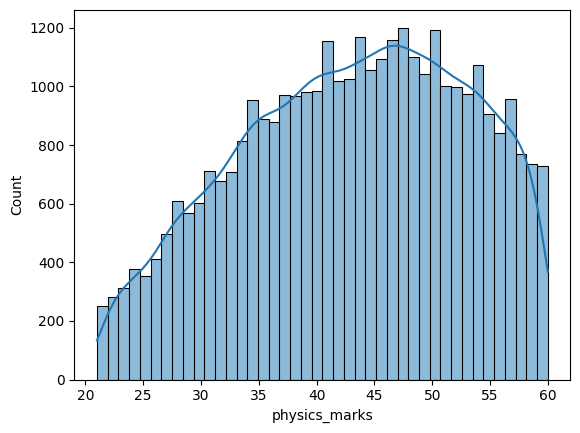

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['physics_marks'], kde=True)





<Axes: xlabel='math_marks', ylabel='Count'>

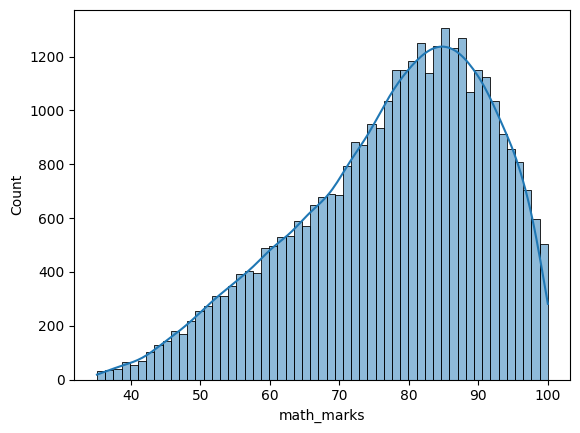

In [367]:
sns.histplot(df['math_marks'], kde=True)

<Axes: xlabel='english_marks', ylabel='Count'>

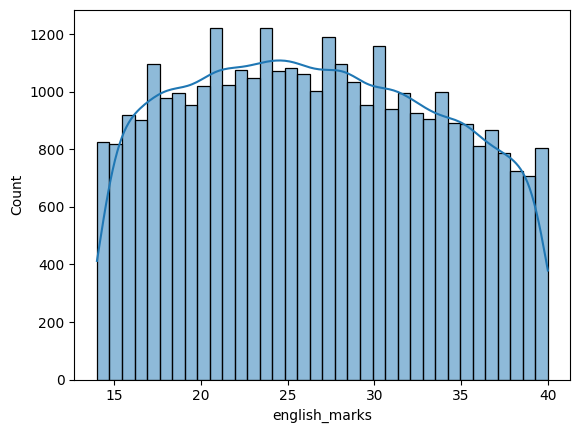

In [368]:
sns.histplot(df['english_marks'], kde=True)

In [370]:
len(df[df['math_marks']<45])

576

In [381]:
import numpy as np
# def removing_outlier(data):
q1=np.percentile(df['math_marks'],25)
q3=np.percentile(df['math_marks'],75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
# fittered_data=[x for x in data if lower_bound<=x<=upper_bond]
# return fittered_data

In [395]:
lower_bound

np.float64(39.30000000000001)

In [396]:
upper_bound

np.float64(117.69999999999999)

In [374]:
len(df['math_marks'])

34999

In [399]:
df['math_marks'].fillna(df['math_marks'].median(), inplace=True)

C:\Users\Raqeeb\AppData\Local\Temp\ipykernel_45200\1274562574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math_marks'].fillna(df['math_marks'].median(), inplace=True)


In [400]:
print("Summary before outlier removal:")
print(df['math_marks'].describe())

print("\nNaN values before processing:", df['math_marks'].isna().sum())

Summary before outlier removal:
count    34999.000000
mean        77.778108
std         13.492844
min         39.400000
25%         68.900000
50%         79.900000
75%         88.300000
max        100.000000
Name: math_marks, dtype: float64

NaN values before processing: 0


In [401]:
df['math_marks'].dtype

dtype('float64')

In [403]:
# Add parentheses around each condition
df['math_marks'] = np.where(
    (df['math_marks'] <= lower_bound) |  # Parentheses added here
    (df['math_marks'] >= upper_bound),   # Parentheses added here
    np.nan,
    df['math_marks']
)

In [404]:
df['math_marks']

0        98.6
1        64.3
2        76.4
3        52.7
4        89.0
         ... 
34994    76.4
34995    91.7
34996    83.3
34997    97.0
34998    70.9
Name: math_marks, Length: 34999, dtype: float64

In [394]:
df[df['math_marks']==np.nan]

Empty DataFrame
Columns: [student_id, physics_marks, math_marks, english_marks, average_marks, time_physics_pct, time_math_pct, time_english_pct, number_of_attempts, university_choices, admission_status, admitted_university, preferred_field, region_preference, university_difficulty_index]
Index: []

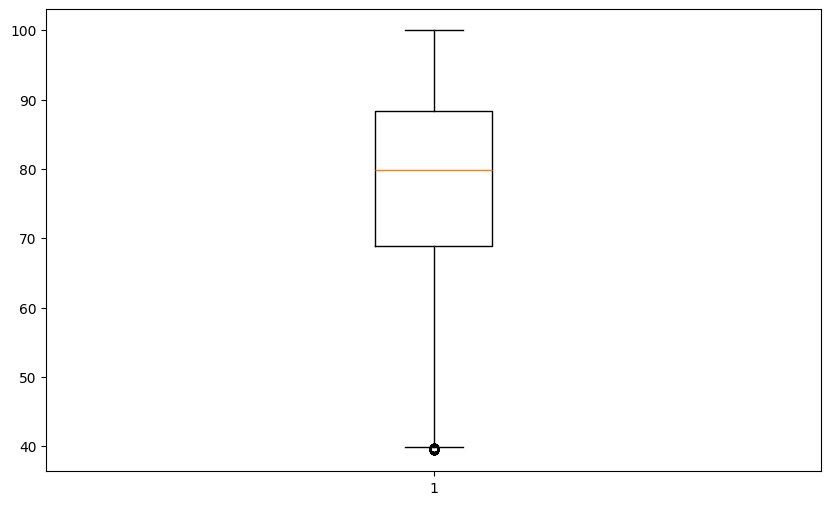

In [405]:
plt.figure(figsize=(10,6))
plt.boxplot(df['math_marks'])
plt.show()

<Axes: xlabel='admission_status', ylabel='count'>

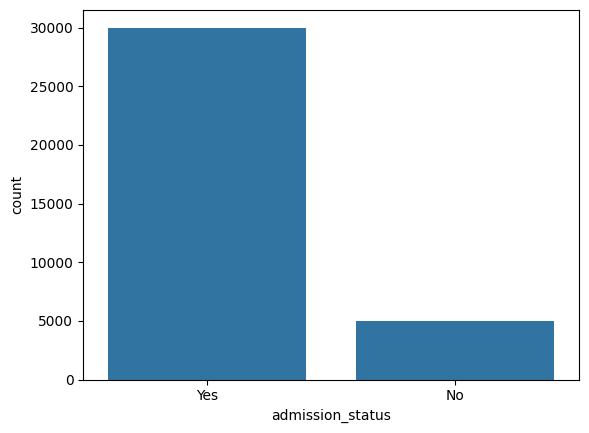

In [406]:
sns.countplot(x='admission_status', data=df)


Something wrong with the dataset as admission status of no is to much as compare to yes which will effect the performance of model 

This problem is called <b>class Imbalance

Issue | Why It’s a Problem
90% 'No' and 10% 'Yes' | Model will just learn to predict "No" always — and still get high accuracy! But it's useless.
Skewed dataset | Bad for learning meaningful patterns for minority class ("Yes")

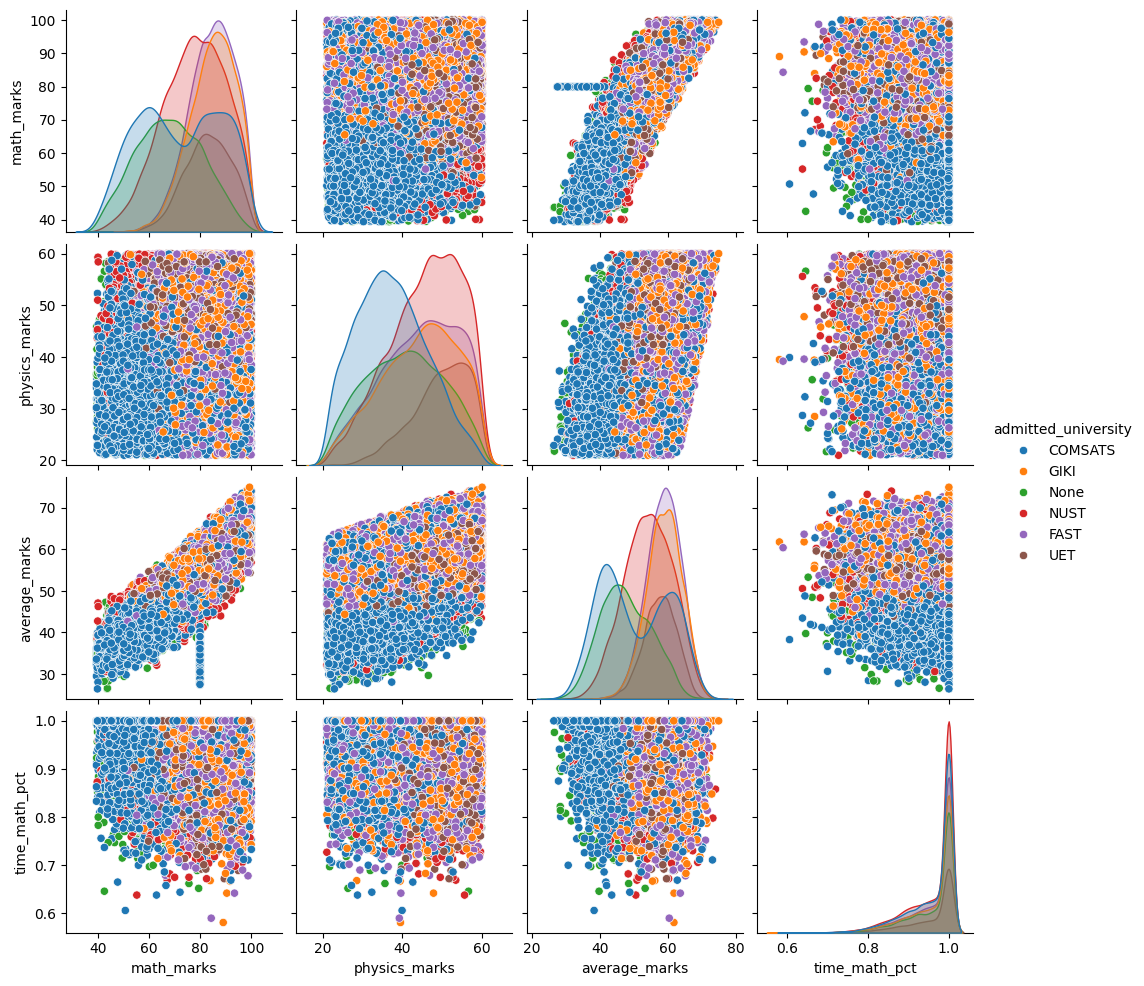

In [409]:
sns.pairplot(df, hue='admitted_university', vars=['math_marks', 'physics_marks', 'average_marks', 'time_math_pct'])


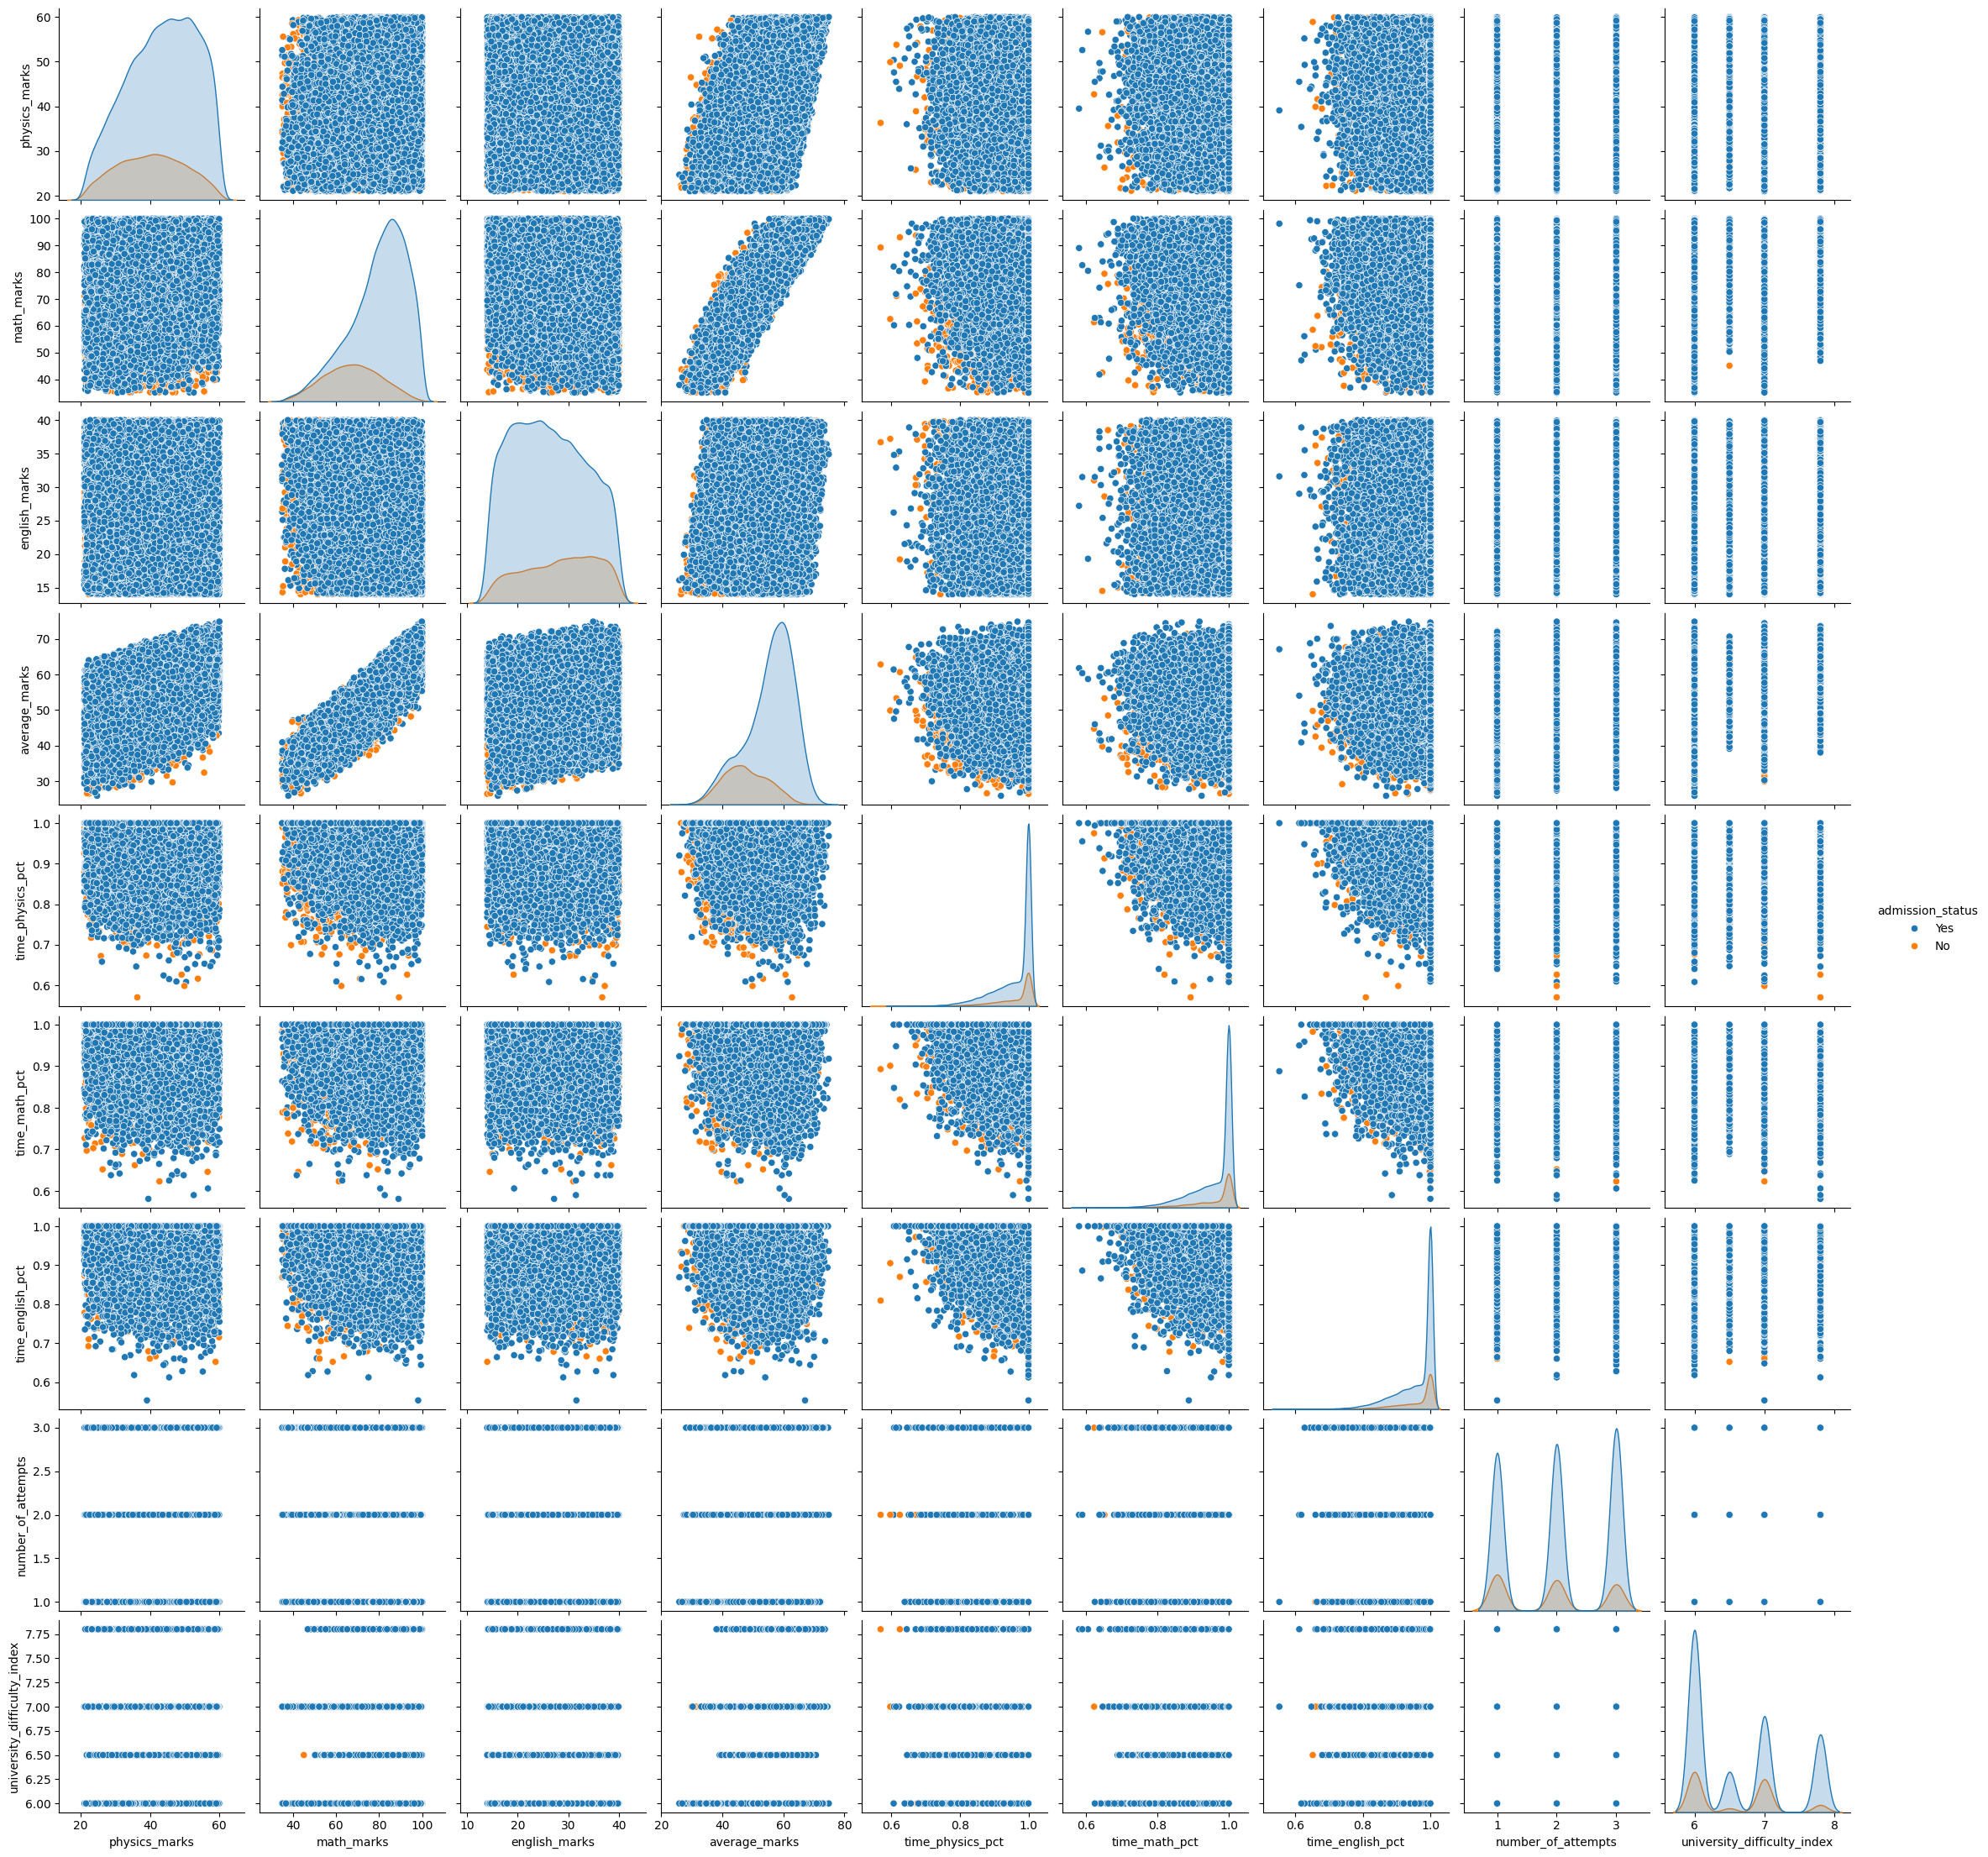

In [246]:
sns.pairplot(df, hue='admission_status')


The dataset in case of time and admission status is not looking good 

<Axes: xlabel='admission_status', ylabel='average_marks'>

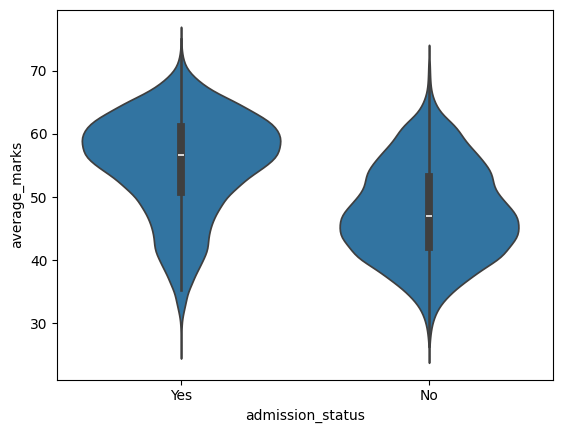

In [410]:
sns.violinplot(x='admission_status', y='average_marks', data=df)


<Axes: xlabel='admission_status'>

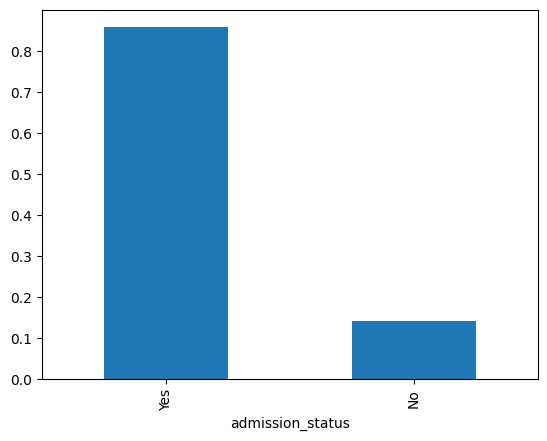

In [411]:
df['admission_status'].value_counts(normalize=True).plot(kind='bar')


<h2>The above dataset it ready as we have almost 50 50 yes and no. Also the relation betweent different attribute are clear. 

1000

<h1>MODEL 1 Testing

In [412]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [11]:
df=pd.read_csv("realistic_student_data.csv")

In [7]:
df.head()

student_id  physics_marks  math_marks  english_marks  average_marks  \
0    ST00001           37.9        98.6           31.4          55.97   
1    ST00002           22.2        98.1           30.8          50.37   
2    ST00003           47.6        85.6           22.4          51.87   
3    ST00004           33.4        66.0           26.4          41.93   
4    ST00005           52.0        73.2           15.1          46.77   

   time_physics  time_math  time_english  number_of_attempts  \
0     55.594511  84.440599     37.395206                   3   
1     51.095609  95.052576     33.374151                   1   
2     46.380620  94.082225     33.859770                   3   
3     64.000000  86.287966     37.971165                   2   
4     58.737199  86.998731     37.455170                   2   

            university_choices admission_status admitted_university  \
0  ['COMSATS', 'FAST', 'GIKI']              Yes             COMSATS   
1  ['GIKI', 'FAST', 'COMSATS']               No                GIKI   
2    ['GIKI', 'FAST', 'PIEAS']               No                GIKI   
3                  ['COMSATS']               No             COMSATS   
4    ['PIEAS', 'NUST', 'FAST']               No                NUST   

  preferred_field region_preference  university_difficulty_index  
0              CS                GB                          6.0  
1              CS       Balochistan                          8.8  
2     Engineering            Punjab                          8.8  
3        Business            Punjab                          6.0  
4     Engineering               KPK                          9.0

Prepare the Data (Features & Target)

Split into Training & Testing Sets

Standardize the Data (Important!)

Train and Compare Models

Show result

Why are the results so close?

Our dataset is well-structured and clean (we scaled it, dropped irrelevant features).

The problem is likely not too complex — the features you have may be highly informative.

Balanced classes — our classes aren't too imbalanced, even simple models can perform well.

Enough data — the models have enough patterns to learn from.

So it’s not bad that we are close — it means our data is good and the models are all doing a decent job.

🔹 When to prefer Logistic Regression
Best ROC AUC: 0.978499

Best F1 Score: 0.924366

Very high precision and recall

🧠 Choose Logistic Regression when you:

Need interpretability (you can explain coefficients)

Care about performance and simplicity

Want less risk of overfitting

🔹 When to prefer SVM
Best Recall: 0.964357

Competitive ROC AUC and F1

📌 Choose SVM if:

You want high recall (better for medical/fraud detection where false negatives are costly)

You're okay with more compute time (SVM can be slower on big datasets)

🔹 When to prefer Random Forest or XGBoost
Slightly behind in F1 and ROC AUC

But very powerful for:

Feature importance

Non-linear relationships

Handling noise

🚀 Choose XGBoost or Random Forest if:

You plan to tune hyperparameters

Need a robust model for real-world deployment

Might work better with more data or added features

🔹 KNN is falling behind:
Lowest in all metrics

KNN doesn’t scale well with high dimensions or many features

🛑 Not preferred unless your problem is very localized or you apply dimensionality reduction.

🎯 Conclusion
Best Overall: Logistic Regression

Highest F1 Score and ROC AUC

Most balanced in precision/recall

Simple and interpretable

In [87]:
df.columns

Index(['student_id', 'physics_marks', 'math_marks', 'english_marks',
       'average_marks', 'time_physics', 'time_math', 'time_english',
       'number_of_attempts', 'university_choices', 'admission_status',
       'admitted_university', 'preferred_field', 'region_preference',
       'university_difficulty_index'],
      dtype='object')

<h2>Using Random Forest

Prblem:multi-class classification problem

In [413]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_uni.classes_)
# disp.plot()


Issue with the below is that we have 50% no and 50% yes labeled data so the model is train for no mostly

Again with simple random forests:

The model is baised towards the none value as compare to universities as none is at one side and all universities are on other side

Issue is that the none values are 50% which is too much i have to reduce it like number of students who didn't admitted to any univeristy. 

<h2>Fixed the none baised problem

In [ ]:
df['admitted_university'].value_counts()

admitted_university
COMSATS    7000
None       7000
NUST       7000
FAST       6288
GIKI       5665
UET        2946
Name: count, dtype: int64

In [352]:
df=dataset_1

In [414]:
df['admitted_university'].value_counts()

admitted_university
NUST       8000
COMSATS    7211
FAST       6189
GIKI       5694
None       5000
UET        2905
Name: count, dtype: int64

In [415]:
import pandas as pd
import numpy as np
import ast
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ====================== UNIVERSITY DATA ======================
UNIVERSITIES = {
    'FAST': {'difficulty': 7.5, 'fields': ['CS', 'Engineering']},
    'NUST': {'difficulty': 7.0, 'fields': ['CS', 'Engineering', 'Medicine']},
    'PIEAS': {'difficulty': 8.5, 'fields': ['Engineering']},
    'UET': {'difficulty': 6.5, 'fields': ['Engineering']},
    'COMSATS': {'difficulty': 6.0, 'fields': ['CS', 'Business']},
    'GIKI': {'difficulty': 8.8, 'fields': ['Engineering', 'CS']}
}

# ====================== DATA LOADING ======================
# df = pd.read_csv("realistic_student_data.csv")
def safe_convert_university_choices(value):
    try:
        if isinstance(value, list):  # Already a list
            return value
        if pd.isna(value):  # Handle NaN values
            return []
        
        # Clean the string
        cleaned = value.strip("[]").replace("'", "").replace('"', '')
        return [uni.strip() for uni in cleaned.split(',') if uni.strip()]
    except:
        return []  # Return empty list for unparseable values

# Apply to your DataFrame
df['university_choices'] = df['university_choices'].apply(safe_convert_university_choices)
df['admitted_university'] = df['admitted_university'].fillna('None')

# ====================== FEATURE ENGINEERING ======================
df['num_universities_applied'] = df['university_choices'].apply(len)
df['safety_school_included'] = df['university_choices'].apply(
    lambda x: any(UNIVERSITIES.get(uni, {}).get('difficulty', 10) < 7 for uni in x)
)

df['physics_marks'] = (df['physics_marks']/60)*100
df['english_marks'] = (df['english_marks']/40)*100
df['time_physics_pct']=(df['time_physics_pct']/60)*100
df['time_english_pct']=(df['time_physics_pct']/40)*100
df['time_math_pct']=(df['time_physics_pct']/100)*100

df['total_normalized_marks'] = df[['math_marks', 'physics_marks', 'english_marks']].mean(axis=1)
df['stem_strength'] = (df['math_marks'] * 0.4 + df['physics_marks'] * 0.3) / 0.7
df['productivity'] = df['total_normalized_marks'] / (df[['time_math_pct', 'time_physics_pct', 'time_english_pct']].sum(axis=1))
    
# ====================== MODEL SETUP ======================
features = [
    'physics_marks', 'math_marks', 'english_marks',
    'time_physics_pct', 'time_math_pct', 'time_english_pct',
    'number_of_attempts', 'preferred_field',
     'university_difficulty_index','total_normalized_marks','stem_strength','productivity',
    'num_universities_applied', 'safety_school_included'
]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), [
        'physics_marks', 'math_marks', 'english_marks',
        'time_physics_pct', 'time_math_pct', 'time_english_pct',
        'number_of_attempts', 'university_difficulty_index',
        'num_universities_applied','total_normalized_marks','stem_strength','productivity'
    ]),
    ('cat', OneHotEncoder(), ['preferred_field'])
])

random_forest_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,#Set the number of decision trees
        class_weight='balanced',
        random_state=1
    ))
])

# ====================== TRAINING ======================
le = LabelEncoder()
y = le.fit_transform(df['admitted_university'])

X_train, X_test, y_train, y_test = train_test_split(
    df[features], y,
    test_size=0.3,
    stratify=y,
    random_state=1
)

random_forest_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['physics_marks',
                                                   'math_marks',
                                                   'english_marks',
                                                   'time_physics_pct',
                                                   'time_math_pct',
                                                   'time_english_pct',
                                                   'number_of_attempts',
                                                   'university_difficulty_index',
                                                   'num_universities_applied',
                                                   'total_normalized_marks',
                                                   'stem_strength',
                                                   'productivity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['preferred_field'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=1))])

In [333]:
df

student_id  physics_marks  math_marks  english_marks  average_marks  \
0        ST00001     487.397119        98.6    3066.406250          66.95   
5        ST00006     412.808642        69.8    2792.968750          42.36   
7        ST00008     362.654321        98.1    2841.796875          63.33   
11       ST00012     357.510288        85.5    1748.046875          54.67   
13       ST00014     453.960905        72.8    2695.312500          52.51   
...          ...            ...         ...            ...            ...   
34541    ST34542     522.119342        97.3    1875.000000          64.67   
34542    ST34543     312.500000        84.7    3378.906250          56.56   
34543    ST34544     590.277778        84.1    2363.281250          56.84   
34544    ST34545     738.168724        93.3    2187.500000          64.76   
34546    ST34547     567.129630        63.5    2294.921875          47.74   

       time_physics_pct  time_math_pct  time_english_pct  number_of_attempts  \
0             12.860082      12.860082         32.150206                   3   
5             12.847222      12.847222         32.118056                   1   
7             12.860082      12.860082         32.150206                   1   
11            12.860082      12.860082         32.150206                   3   
13            12.860082      12.860082         32.150206                   1   
...                 ...            ...               ...                 ...   
34541         12.860082      12.860082         32.150206                   3   
34542         12.860082      12.860082         32.150206                   1   
34543         12.860082      12.860082         32.150206                   3   
34544         10.390947      10.390947         25.977366                   2   
34546         12.860082      12.860082         32.150206                   2   

          university_choices  ... region_preference  \
0      [COMSATS, FAST, GIKI]  ...                GB   
5                     [NUST]  ...                GB   
7      [COMSATS, GIKI, NUST]  ...               KPK   
11     [NUST, COMSATS, FAST]  ...       Balochistan   
13     [COMSATS, NUST, GIKI]  ...            Punjab   
...                      ...  ...               ...   
34541  [FAST, GIKI, COMSATS]  ...               KPK   
34542  [FAST, COMSATS, GIKI]  ...             Sindh   
34543      [FAST, GIKI, UET]  ...               KPK   
34544      [FAST, UET, GIKI]  ...             Sindh   
34546      [FAST, GIKI, UET]  ...               KPK   

      university_difficulty_index num_universities_applied  \
0                             6.0                        3   
5                             7.0                        1   
7                             6.0                        3   
11                            7.0                        3   
13                            6.0                        3   
...                           ...                      ...   
34541                         6.0                        3   
34542                         6.0                        3   
34543                         6.0                        3   
34544                         6.0                        3   
34546                         6.0                        3   

      safety_school_included  total_normalized_marks  stem_strength  \
0                       True             1217.467790     265.227337   
5                      False             1091.859131     216.803704   
7                       True             1100.850399     211.480423   
11                      True              730.352388     202.075838   
13                      True             1074.024468     236.154674   
...                      ...                     ...            ...   
34541                   True              831.473114     279.365432   
34542                   True             1258.702083     182.328571   
34543                   True             1012.553009     301.033333   
3454

<h2>Accuracy with more None values in the data set

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# y_pred = random_forest_model.predict(X_test)
# print("=== Model Performance (Without Difficulty Index) ===")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_))

=== Model Performance (Without Difficulty Index) ===
Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.56      0.64      0.59      2100
        FAST       0.69      0.75      0.72      1886
        GIKI       0.91      0.99      0.95      1700
        NUST       0.75      0.88      0.81      2100
        None       0.43      0.21      0.28      2100
         UET       0.90      0.99      0.94       884

    accuracy                           0.71     10770
   macro avg       0.71      0.74      0.72     10770
weighted avg       0.68      0.71      0.68     10770



<h2>Accuracy with Better dataset where None values are 5000

In [416]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = random_forest_model.predict(X_test)
print("=== Model Performance (Without Difficulty Index) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

=== Model Performance (Without Difficulty Index) ===
Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.62      0.73      0.67      2163
        FAST       0.71      0.75      0.73      1857
        GIKI       0.93      1.00      0.96      1708
        NUST       0.81      0.95      0.88      2400
        None       0.34      0.09      0.14      1500
         UET       0.93      0.99      0.96       872

    accuracy                           0.76     10500
   macro avg       0.72      0.75      0.72     10500
weighted avg       0.71      0.76      0.72     10500



<h1>Logistic Regression accuracy

In [417]:
logistic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced',   #  This will handle imbalance!
        max_iter=3000,             #  Logistic Regression needs more iterations sometimes
        random_state=42
    ))
])
#On random state 42 in give 0.1 more accuracy then 0 or 1
# ====================== TRAINING ======================

le = LabelEncoder()
y = le.fit_transform(df['admitted_university'])

X_train, X_test, y_train, y_test = train_test_split(
    df[features], y,
    test_size=0.3,
    stratify=y,
    random_state=0
)

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['physics_marks',
                                                   'math_marks',
                                                   'english_marks',
                                                   'time_physics_pct',
                                                   'time_math_pct',
                                                   'time_english_pct',
                                                   'number_of_attempts',
                                                   'university_difficulty_index',
                                                   'num_universities_applied',
                                                   'total_normalized_marks',
                                                   'stem_strength',
                                                   'productivity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['preferred_field'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=3000,
                                    random_state=42))])

<h2>This is the accuracy with Good_71_accuracy.csv dataset

In [357]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Predict on test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)

# Calculate metrics
print("=== Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

=== Model Performance ===
Accuracy: 0.71

Confusion Matrix:
[[1272  659    0    0  169    0]
 [ 249 1637    0    0    0    0]
 [   0    0 1700    0    0    0]
 [   0    0    0 1813  287    0]
 [ 716  166  180  647  295   96]
 [   0    0    0    0    0  884]]

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.57      0.61      0.59      2100
        FAST       0.66      0.87      0.75      1886
        GIKI       0.90      1.00      0.95      1700
        NUST       0.74      0.86      0.80      2100
        None       0.39      0.14      0.21      2100
         UET       0.90      1.00      0.95       884

    accuracy                           0.71     10770
   macro avg       0.69      0.75      0.71     10770
weighted avg       0.66      0.71      0.67     10770



<h2>This is the accuracy with better_74_accuracy.csv dataset

In [418]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Predict on test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)

# Calculate metrics
print("=== Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

=== Model Performance ===
Accuracy: 0.74

Confusion Matrix:
[[1226  715    0    0  222    0]
 [ 221 1636    0    0    0    0]
 [   0    0 1708    0    0    0]
 [   0    0    0 2142  258    0]
 [ 462  118  139  474  232   75]
 [   0    0    0    0    0  872]]

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.64      0.57      0.60      2163
        FAST       0.66      0.88      0.76      1857
        GIKI       0.92      1.00      0.96      1708
        NUST       0.82      0.89      0.85      2400
        None       0.33      0.15      0.21      1500
         UET       0.92      1.00      0.96       872

    accuracy                           0.74     10500
   macro avg       0.72      0.75      0.72     10500
weighted avg       0.71      0.74      0.72     10500



In [26]:
df['admitted_university'].value_counts()

admitted_university
COMSATS    6848
FAST       6765
NUST       6755
GIKI       6638
UET        5726
None       5001
Name: count, dtype: int64

In [51]:
features

['physics_marks',
 'math_marks',
 'english_marks',
 'time_physics',
 'time_math',
 'time_english',
 'number_of_attempts',
 'preferred_field',
 'region_preference',
 'university_difficulty_index',
 'num_universities_applied',
 'safety_school_included']

In [255]:
X_test

physics_marks  math_marks  english_marks  time_physics_pct  \
13305      60.666667        72.4          94.75         88.421539   
14165      82.333333        91.7          38.00        107.825838   
33475      96.500000        84.2          83.75        107.304792   
14315      93.500000        81.6          41.50         87.112034   
24389      77.333333        76.9          96.50         86.326677   
...              ...         ...            ...               ...   
6242       65.833333        53.0          52.25         94.415327   
44266      54.000000        84.1          75.50         89.077108   
11024      67.833333        98.5          64.00         94.857477   
31299      55.000000        95.2          50.75         81.026970   
15774      87.166667        93.8          48.50         92.612672   

       time_math_pct  time_english_pct  number_of_attempts preferred_field  \
13305      99.759158        109.106571                   3        Business   
14165     105.023431        108.221258                   1              CS   
33475      99.358753        102.395099                   3     Engineering   
14315     103.611288        103.088987                   1     Engineering   
24389      98.224880        104.361735                   1        Medicine   
...              ...               ...                 ...             ...   
6242       97.881625         98.062756                   3        Business   
44266      96.235251        108.447907                   2     Engineering   
11024     110.000000         95.731559                   3              CS   
31299     105.285824         80.885070                   1              CS   
15774      91.038059         76.909845                   3              CS   

       university_difficulty_index  num_universities_applied  \
13305                          6.0                         1   
14165                          7.0                         4   
33475                          7.8                         4   
14315                          6.0                         4   
24389                          7.0                         1   
...                            ...                       ...   
6242                           6.0                         1   
44266                          6.5                         4   
11024                          7.8                         4   
31299                          7.8                         4   
15774                          7.8                         4   

       safety_school_included  
13305                    True  
14165                    True  
33475                    True  
14315                    True  
24389                    True  
...                       ...  
6242                     True  
44266                    True  
11024                    True  
31299                    True  
15774                    True  

[13500 rows x 11 columns]

<h2>Their is something wrong above i get 0.76 accuracy but with the same model i am getting 0.92 how ? and why? 

In [419]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Predict on test set
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)

# Calculate metrics
print("=== Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

=== Model Performance ===
Accuracy: 0.92

Confusion Matrix:
[[1987  137    0    0   39    0]
 [ 127 1730    0    0    0    0]
 [   0    0 1708    0    0    0]
 [   0    0    0 2363   37    0]
 [ 160   39   57  169 1048   27]
 [   0    0    0    0    2  870]]

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.87      0.92      0.90      2163
        FAST       0.91      0.93      0.92      1857
        GIKI       0.97      1.00      0.98      1708
        NUST       0.93      0.98      0.96      2400
        None       0.93      0.70      0.80      1500
         UET       0.97      1.00      0.98       872

    accuracy                           0.92     10500
   macro avg       0.93      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



For a particular dataset Random forest was giving 0.82 percent but that data by mistake overwritten and lost(Testing Fail)

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import numpy as np
# # Predict on test set
# y_pred = random_forest_model.predict(X_test)
# y_pred_proba = random_forest_model.predict_proba(X_test)

# # Calculate metrics
# print("=== Model Performance ===")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_))

# #Ouput:=== Model Performance ===
# Accuracy: 0.82

# Confusion Matrix:
# [[1674  719    0    0    7    0]
#  [ 236 2163    0    0    1    0]
#  [   0    0 2400    0    0    0]
#  [   0    0    0 2368   32    0]
#  [ 555  137  126  591   23   68]
#  [   0    0    0    0    0 2400]]

# Classification Report:
#               precision    recall  f1-score   support

#      COMSATS       0.68      0.70      0.69      2400
#         FAST       0.72      0.90      0.80      2400
#         GIKI       0.95      1.00      0.97      2400
#         NUST       0.80      0.99      0.88      2400
#         None       0.37      0.02      0.03      1500
#          UET       0.97      1.00      0.99      2400

#     accuracy                           0.82     13500
#    macro avg       0.75      0.77      0.73     13500
# weighted avg       0.77      0.82      0.77     13500

=== Model Performance ===
Accuracy: 0.82

Confusion Matrix:
[[1674  719    0    0    7    0]
 [ 236 2163    0    0    1    0]
 [   0    0 2400    0    0    0]
 [   0    0    0 2368   32    0]
 [ 555  137  126  591   23   68]
 [   0    0    0    0    0 2400]]

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.68      0.70      0.69      2400
        FAST       0.72      0.90      0.80      2400
        GIKI       0.95      1.00      0.97      2400
        NUST       0.80      0.99      0.88      2400
        None       0.37      0.02      0.03      1500
         UET       0.97      1.00      0.99      2400

    accuracy                           0.82     13500
   macro avg       0.75      0.77      0.73     13500
weighted avg       0.77      0.82      0.77     13500



Accuracy with Good_71_accuracy.csv

In [321]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
scores = cross_val_score(random_forest_model, df[features], y, cv=skf, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(scores.std()))


Cross-Validation Scores: [0.74848046 0.75180897 0.74931249 0.74627298 0.75322044]
Mean Accuracy: 74.98%
Standard Deviation: 0.00


Cross validation scores tell the accuracy from each split of data
Mean accuracy is the mean of all the accuracies
and standard deviation tell how much the accuraies are deviated 

Latest:

In [420]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
scores = cross_val_score(random_forest_model, df[features], y, cv=skf, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(scores.std()))

Cross-Validation Scores: [0.74871429 0.75971429 0.75714286 0.75742857 0.75653665]
Mean Accuracy: 75.59%
Standard Deviation: 0.00


In [281]:
df['time_english_pct']

0        1.000
5        0.894
7        1.000
11       1.000
13       1.000
         ...  
35890    0.972
35893    0.967
35894    0.954
35895    1.000
35898    0.921
Name: time_english_pct, Length: 20288, dtype: float64

<h1>TESTING CODE

In [268]:
df.columns

Index(['student_id', 'physics_marks', 'math_marks', 'english_marks',
       'average_marks', 'time_physics_pct', 'time_math_pct',
       'time_english_pct', 'number_of_attempts', 'university_choices',
       'admission_status', 'admitted_university', 'preferred_field',
       'region_preference', 'university_difficulty_index'],
      dtype='object')

In [77]:
import pandas as pd
df=pd.read_csv('realistic_student_data.csv')
df=pd.DataFrame(df)

In [15]:
df['admitted_university'] = df['admitted_university'].fillna('None')


In [16]:
df['admitted_university'].value_counts()

admitted_university
COMSATS    6848
FAST       6765
NUST       6755
GIKI       6638
UET        5726
None       5001
Name: count, dtype: int64

<h2>Comparing Different models


<h2>Compare with the good_71_accuracy.csv 

In [358]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import ast
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "SVM": SVC(probability=True, random_state=1),
    "XGBoost": XGBClassifier(eval_metric='logloss', n_jobs=-1, random_state=1)
}
X_train, X_test, y_train, y_test = train_test_split(
    df[features], y,
    test_size=0.3,
    stratify=y,
    random_state=1
)

# ==== Apply preprocessing first ====
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

results = {}

for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)  # Train model
    y_pred = model.predict(X_test_preprocessed)  # Predict
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    # roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_preprocessed)[:,1])

    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1 Score": report["1"]["f1-score"],
        # "ROC AUC": roc_auc
    }


In [359]:
results

{'Logistic Regression': {'Accuracy': 0.7083565459610028,
  'Precision': 0.6874129122155133,
  'Recall': 0.7847295864262991,
  'F1 Score': 0.7328546669967814},
 'Random Forest': {'Accuracy': 0.7088207985143918,
  'Precision': 0.6949069539666993,
  'Recall': 0.7523860021208908,
  'F1 Score': 0.7225050916496945},
 'KNN': {'Accuracy': 0.6878365831012071,
  'Precision': 0.6893595562279374,
  'Recall': 0.7248144220572641,
  'F1 Score': 0.7066425432928405},
 'SVM': {'Accuracy': 0.7176415970287836,
  'Precision': 0.6460211681693454,
  'Recall': 0.8738069989395546,
  'F1 Score': 0.7428442641424385},
 'XGBoost': {'Accuracy': 0.7078922934076137,
  'Precision': 0.6839577329490875,
  'Recall': 0.7550371155885471,
  'F1 Score': 0.717741935483871}}

In [ ]:
# Models_comparation_with_71_accuracy_dataset=pd.DataFrame(results)

In [ ]:
# Models_comparation_with_71_accuracy_dataset

Logistic Regression  Random Forest       KNN       SVM   XGBoost
Accuracy              0.708357       0.708821  0.687837  0.717642  0.707892
Precision             0.687413       0.694907  0.689360  0.646021  0.683958
Recall                0.784730       0.752386  0.724814  0.873807  0.755037
F1 Score              0.732855       0.722505  0.706643  0.742844  0.717742

In [ ]:
# Models_comparation_with_71_accuracy_dataset.to_json('Models_comparation_with_71_accuracy_dataset.json')

In [23]:
results

Logistic Regression  Random Forest       KNN       SVM   XGBoost
Accuracy              0.714311       0.709099  0.563869  0.713869  0.701060
Precision             0.897615       0.893002  0.692460  0.897615  0.872532
Recall                0.760099       0.760591  0.687685  0.760099  0.762069
F1 Score              0.823153       0.821495  0.690064  0.823153  0.813568

As logistic regression is perform well so we use both randomforest and logistic regression

<h1>With data of Best_74_accuracy.csv

In [422]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import ast
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "SVM": SVC(probability=True, random_state=1),
    "XGBoost": XGBClassifier(eval_metric='logloss', n_jobs=-1, random_state=1)
}
X_train, X_test, y_train, y_test = train_test_split(
    df[features], y,
    test_size=0.3,
    stratify=y,
    random_state=1
)

# ==== Apply preprocessing first ====
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

results = {}

for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)  # Train model
    y_pred = model.predict(X_test_preprocessed)  # Predict
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    # roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_preprocessed)[:,1])

    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1 Score": report["1"]["f1-score"],
        # "ROC AUC": roc_auc
    }

In [424]:
results=pd.DataFrame(results)
results


Logistic Regression  Random Forest       KNN       SVM   XGBoost
Accuracy              0.770381       0.755810  0.729524  0.766381  0.759048
Precision             0.732668       0.706984  0.695429  0.714517  0.710621
Recall                0.751212       0.752289  0.729133  0.712978  0.745827
F1 Score              0.741824       0.728933  0.711882  0.713747  0.727798

In [427]:
results.to_json('Models_comparation_with_74_accuracy_dataset.json')

Saving Model

In [426]:
import joblib
joblib.dump(random_forest_model,'Best_74_accuracy_Model.pkl')

['Best_74_accuracy_Model.pkl']

In [327]:
X_test

math_normalized  physics_normalized  english_normalized  time_math_pct  \
13946             49.0          339.506173         1335.937500       7.361111   
7595              75.1          242.283951          875.000000       7.399691   
27894             78.5          378.086420         1265.625000       7.662037   
31738             60.6          738.168724         2119.140625       7.716049   
16248             84.2          394.804527         2568.359375       7.716049   
...                ...                 ...                 ...            ...   
33840             81.2          323.302469          875.000000       7.716049   
5862              78.1          374.228395          984.375000       6.844136   
2190              94.8          377.314815          976.562500       7.716049   
30995             75.4          572.273663         2275.390625       7.716049   
32174             77.0          657.150206         1914.062500       7.716049   

       time_physics_pct  time_english_pct  number_of_attempts preferred_field  \
13946          7.361111         18.402778                   2        Business   
7595           7.399691         18.499228                   2              CS   
27894          7.662037         19.155093                   3        Business   
31738          7.716049         19.290123                   1     Engineering   
16248          7.716049         19.290123                   1              CS   
...                 ...               ...                 ...             ...   
33840          7.716049         19.290123                   3              CS   
5862           6.844136         17.110340                   3              CS   
2190           7.716049         19.290123                   2              CS   
30995          7.716049         19.290123                   3              CS   
32174          7.716049         19.290123                   3     Engineering   

       university_difficulty_index  stem_strength  productivity  \
13946                          6.0     173.502646     17.352892   
7595                           7.0     146.750265     11.936273   
27894                          6.0     206.894180     16.649778   
31738                          6.0     350.986596     28.011930   
16248                          6.0     217.316226     29.254693   
...                            ...            ...           ...   
33840                          6.0     184.958201     12.283224   
5862                           7.0     205.012169     15.549439   
2190                           7.0     215.877778     13.907302   
30995                          6.0     288.345855     28.061417   
32174                          6.0     325.635802     25.422842   

       total_normalized_marks  
13946              574.814558  
7595               397.461317  
27894              574.070473  
31738              972.636450  
16248             1015.787967  
...                       ...  
33840              426.500823  
5862               478.901132  
2190               482.892438  
30995              974.354763  
32174              882.737569  

[6221 rows x 12 columns]

ValueError: columns are missing: {'physics_marks', 'math_marks', 'english_marks', 'num_universities_applied'}

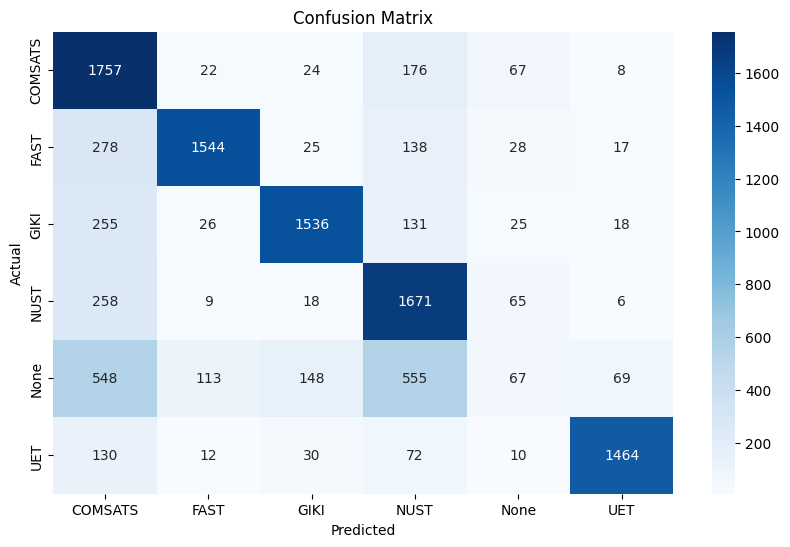

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

As Model given to much importance to university_difficulty_index so we will remove this and check the performance of model

Accuracy: 0.4602

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.26      0.12      0.17      2019
        FAST       0.22      0.18      0.19      1336
        GIKI       0.21      0.14      0.17      1255
        NUST       0.34      0.15      0.21      2593
        None       0.56      0.86      0.68      6650
       PIEAS       0.18      0.11      0.13       543
         UET       0.13      0.10      0.11       604

    accuracy                           0.46     15000
   macro avg       0.27      0.24      0.24     15000
weighted avg       0.39      0.46      0.40     15000



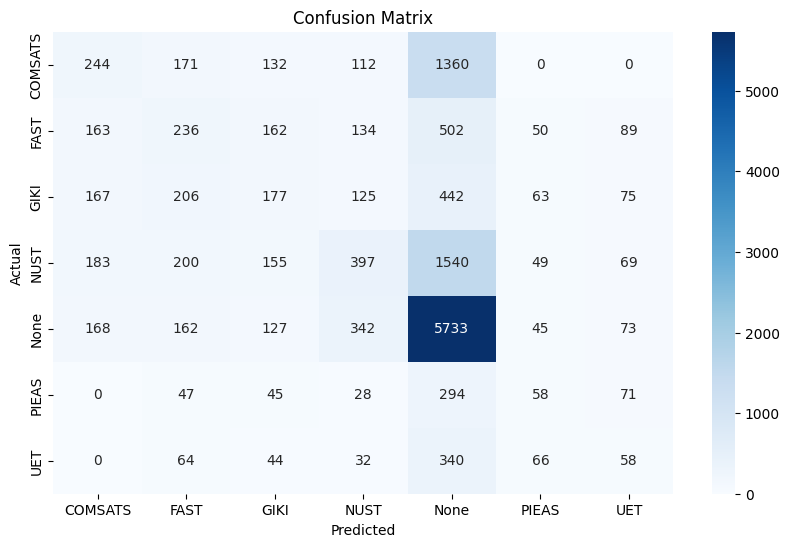

Solution when we remove the university_difficult_index:

=== Model Performance ===
Accuracy: 0.37

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.40      0.54      0.46      2054
        FAST       0.26      0.18      0.21      2030
        GIKI       0.28      0.19      0.23      1991
        NUST       0.48      0.40      0.44      2027
        None       0.23      0.11      0.15      1500
         UET       0.40      0.78      0.53      1718

    accuracy                           0.37     11320
   macro avg       0.34      0.37      0.33     11320
weighted avg       0.35      0.37      0.34     11320


=== Top Predictions ===
  university  probability
1       FAST        0.365
0    COMSATS        0.215
3       NUST        0.155


In [9]:
df.describe()

physics_marks    math_marks  english_marks  average_marks  \
count   50000.000000  50000.000000   50000.000000   50000.000000   
mean       42.147850     73.479162      27.623508      51.550192   
std         9.863616     14.496354       7.175398       8.723454   
min        21.000000     35.000000      14.000000      26.740000   
25%        34.600000     62.500000      21.700000      44.680000   
50%        42.600000     74.400000      27.800000      51.900000   
75%        50.100000     85.100000      33.700000      58.530000   
max        60.000000    100.000000      40.000000      74.620000   

       time_physics     time_math  time_english  number_of_attempts  \
count  50000.000000  50000.000000  50000.000000        50000.000000   
mean      53.969193     89.947604     35.954182            2.003100   
std        4.904521      4.928092      4.907912            0.818281   
min       32.523045     69.069262     15.000000            1.000000   
25%       50.657395     86.597800     32.614705            1.000000   
50%       54.017165     89.963752     35.989842            2.000000   
75%       57.362063     93.367525     39.373404            3.000000   
max       64.000000    100.000000     46.000000            3.000000   

       university_difficulty_index  admitted_difficulty  math_vs_difficulty  \
count                 50000.000000         50000.000000        50000.000000   
mean                      7.697234             7.440524            9.978680   
std                       1.327868             1.008421            2.114317   
min                       6.000000             6.000000            3.977778   
25%                       6.000000             7.000000            8.511111   
50%                       8.500000             7.000000            9.826667   
75%                       9.000000             8.800000           11.227273   
max                       9.000000             9.000000           16.666667   

       physics_vs_difficulty  math_safety_score  num_universities_applied  
count           50000.000000       50000.000000              50000.000000  
mean                5.721943          43.100404                  2.001840  
std                 1.388382          37.888388                  1.000008  
min                 2.344444           0.000000                  1.000000  
25%                 4.700000           0.000000                  1.000000  
50%                 5.700000          54.400000                  3.000000  
75%                 6.653333          78.700000                  3.000000  
max                10.000000         100.000000                  3.000000

In [15]:
df.columns

Index(['student_id', 'physics_marks', 'math_marks', 'english_marks',
       'average_marks', 'time_physics', 'time_math', 'time_english',
       'number_of_attempts', 'university_choices', 'admission_status',
       'admitted_university', 'preferred_field', 'region_preference',
       'university_difficulty_index', 'num_universities_applied',
       'safety_school_included'],
      dtype='object')


=== Training Random Forest ===
Cross-validated accuracy: 0.48 ± 0.00

Test Accuracy: 0.48
Balanced Accuracy: 0.31
Macro F1 Score: 0.31

Classification Report:
              precision    recall  f1-score   support

     COMSATS       0.31      0.16      0.21      2019
        FAST       0.29      0.29      0.29      1336
        GIKI       0.25      0.18      0.21      1255
        NUST       0.37      0.18      0.24      2593
        None       0.59      0.82      0.68      6650
       PIEAS       0.23      0.17      0.20       543
         UET       0.30      0.39      0.34       604

    accuracy                           0.48     15000
   macro avg       0.34      0.31      0.31     15000
weighted avg       0.43      0.48      0.44     15000


Best model: Random Forest


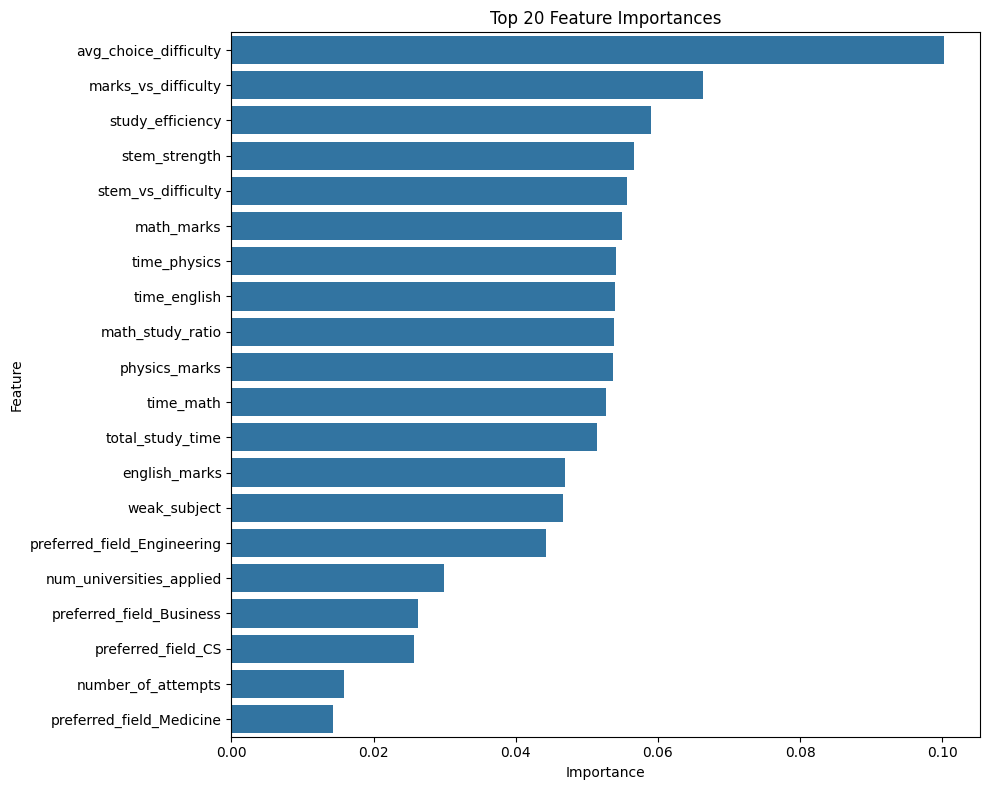


=== Admission Predictions ===
Student Profile:
- Physics: 50, Math: 80, English: 32
- Preferred Field: CS
- Region Preference: Punjab

Applied to: FAST, NUST, COMSATS

Top Predictions:
1. FAST (Difficulty: 7.5)
   Admission Confidence: 30.0%
   Fields Offered: CS, Engineering
2. NUST (Difficulty: 9.0)
   Admission Confidence: 21.5%
   Fields Offered: CS, Engineering, Medicine
3. COMSATS (Difficulty: 6.0)
   Admission Confidence: 18.0%
   Fields Offered: CS, Business


In [9]:
df['admission_status']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
49995    Yes
49996     No
49997    Yes
49998    Yes
49999    Yes
Name: admission_status, Length: 50000, dtype: object

In [11]:
df.columns


Index(['student_id', 'physics_marks', 'math_marks', 'english_marks',
       'average_marks', 'time_physics', 'time_math', 'time_english',
       'number_of_attempts', 'university_choices', 'admission_status',
       'admitted_university', 'preferred_field', 'region_preference',
       'university_difficulty_index', 'num_universities_applied',
       'safety_school_included', 'stem_strength', 'weak_subject',
       'academic_balance', 'total_study_time', 'study_efficiency',
       'math_study_ratio', 'avg_choice_difficulty', 'has_preferred_field',
       'marks_vs_difficulty', 'stem_vs_difficulty'],
      dtype='object')

In [15]:
check=df[df['admitted_university']!='None']
len(check['admitted_university'])

27833